<h1><center> Higgs Boson Event Detection </center></h1>


### Contents

- Introduction
- Basic Data Exploration
- Univariate Analysis
- Multivariate Analysis
- Modeling

### Importing libraries

In [1]:
# %%capture
# File system manangement
import time, os

# Progress bar for loops
# !pip install tqdm
from tqdm import tqdm

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

import seaborn as sns
sns.set_theme()
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras


# 1. Introduction

- Backstory
- LHC at Work
- Enter ML
- Data
- Project Objective
- Evaluation Metric

## 1.1. Backstory

**Particle accelerators.** To probe into the basic questions on how matter, space and time work and how they are structured, physicists focus on the simplest interactions (for example, collision of [subatomic particles](https://en.wikipedia.org/wiki/Subatomic_particle)) at very high energy. [Particle accelerators](https://en.wikipedia.org/wiki/Particle_accelerator) enable physicists to explore the fundamental nature of matter by observing subatomic particles produced by high-energy collisions of [particle beams](https://en.wikipedia.org/wiki/Particle_beam). The experimental measurements from these collisions inevitably lack precision, which is where [machine learning](https://en.wikipedia.org/wiki/Machine_learning) (ML) comes into picture. The research community typically relies on standardized machine learning software packages for the analysis of the data obtained from such experiments and spends a huge amount of effort towards improving statistical power by extracting features of significance, derived from the raw measurements.

**Higgs boson.** The [Higgs boson](https://en.wikipedia.org/wiki/Higgs_boson) [particle](https://en.wikipedia.org/wiki/Elementary_particle), also called the *God particle* in mainstream media, is the final ingredient of the [standard model](https://en.wikipedia.org/wiki/Standard_Model) of [particle physics](https://en.wikipedia.org/wiki/Particle_physics), which sets the rules for the subatomic particles and forces. The [elementary particles](https://en.wikipedia.org/wiki/Elementary_particle) are supposed to be massless at very high energies, but some of them can acquire mass at low-energies. The mechanism of this acquiring remained an enigma in theoretical physics for a long time. In $1964$, [Peter Higgs](https://en.wikipedia.org/wiki/Peter_Higgs) and others proposed a [mechanism](https://en.wikipedia.org/wiki/Higgs_mechanism) that theoretically explains the [origin of mass of elementary particles](https://en.wikipedia.org/wiki/Mass_generation). The mechanism involves a *field*, commonly known as [Higgs field](https://en.wikipedia.org/wiki/Higgs_mechanism#Structure_of_the_Higgs_field), that the paricles can interact with to gain mass. The more a particle interacts with it, the heavier it is. Some particles, like [photon](https://en.wikipedia.org/wiki/Photon), do not interact with this field at all and remain massless. The Higgs boson particle is the associated particle of the Higgs field (all fundamental fields have one). It is essentially the physical manifestation of the Higgs field, which gives mass to other particles. The detection of this elusive particle waited almost half a century since its theorization!

**The discovery.** On 4th July 2012, the [ATLAS](https://home.cern/science/experiments/atlas) and [CMS](https://home.cern/science/experiments/cms) experiments at [CERN](https://en.wikipedia.org/wiki/CERN)'s [Large Hadron Collider](https://en.wikipedia.org/wiki/Large_Hadron_Collider) (LHC) announced that both of them had observed a new particle in the mass region around 125 GeV. This particle is consistent with the theorized Higgs boson. This experimental confirmation earned [François Englert](https://en.wikipedia.org/wiki/Fran%C3%A7ois_Englert) and Peter Higgs [The Nobel Prize in Physics 2013](https://www.nobelprize.org/prizes/physics/2013/summary/)
> "for the theoretical discovery of a mechanism that contributes to our understanding of the origin of mass of subatomic particles, and which recently was confirmed through the discovery of the predicted fundamental particle, by the ATLAS and CMS experiments at CERN's Large Hadron Collider."

**Giving mass to fermions.** There are many different processes through which the Higgs boson can decay and produce other particles. In physics, the possible transformations a particle can undergo as it decays are referred to as [channels](https://atlas.cern/glossary/decay-channel). The Higgs boson has been observed first to decay in three distinct decay channels, all of which are [boson](https://en.wikipedia.org/wiki/Boson) pairs. To establish that the Higgs field provides the interaction which gives mass to the fundamental [fermions](https://en.wikipedia.org/wiki/Fermion) (particles which follow the [Fermi-Dirac statistics](https://en.wikipedia.org/wiki/Fermi%E2%80%93Dirac_statistics), contrary to the bosons which follow the [Bose-Einstein statistics](https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_statistics)) as well, it has to be demonstrated that the Higgs boson can decay into fermion pairs through direct [decay](https://en.wikipedia.org/wiki/Particle_decay) modes. Subsequently, to seek evidence on the decay of Higgs boson into fermion pairs (such as [tau leptons](https://simple.wikipedia.org/wiki/Tau_lepton) $(\tau)$ or [b-quarks](https://en.wikipedia.org/wiki/Bottom_quark)) and to precisely measure their characteristics became one of the important lines of enquiry. Among the available modes, the most promising is the decay to a pair of tau leptons, which balances a modest branching ratio with manageable backgrounds. The first evidence of $h \to \tau^+\tau^-$ decays [was recently reported](https://cds.cern.ch/record/1632191), based on the full set of proton–proton collision data recorded by the ATLAS experiment at the LHC during $2011$-$2012$. Despite the consistency of the data with $h \to \tau^+\tau^-$ decays, it could not be ensured that the statistical power exceeds the $5\sigma$ threshold, which is the required standard for claims of discovery in high-energy physics community.

<figure>
    <img src = "https://raw.githubusercontent.com/sugatagh/Higgs-Boson-Event-Detection/main/Image/atlas_experiment.png" alt = "Higgs into fermions: Evidence of the Higgs boson decaying to fermions" width = "600">
    <figcaption> Fig 1. Higgs into fermions: Evidence of the Higgs boson decaying to fermions (image credit: CERN) </figcaption>
</figure>

## 1.2. LHC at Work

**Proton-proton collisions.** In particle physics, an *event* refers to the results just after a [fundamental interaction](https://en.wikipedia.org/wiki/Fundamental_interaction) took place between subatomic particles, occurring in a very short time span, at a well-localized region of space. In the LHC, swarms of protons are accelerated on a circular trajectory in both directions, at an extremely high speed. These swarms are made to cross in the ATLAS detector, causing hundreds of millions of proton-proton collisions per second. The resulting *events* are detected by sensors, producing a sparse vector of about a hundred thousand dimensions (roughly corresponding to an image or speech signal in classical machine learning applications). The feature construction phase involves extracting type, energy, as well as $3$-D direction of each particle from the raw data. Also, the variable-length list of four-tuples is digested into a fixed-length vector of features containing up to tens of real-valued variables.

**Background events, signal events and selection region.** Some of these variables are first used in a real-time multi-stage cascade classifier (called the trigger) to discard most of the uninteresting events (called *background events*). The selected events (roughly four hundred per second) are then written on disks by a large CPU farm, producing petabytes of data per year. The saved events still, in large majority, represent known processes (these are also *background events*). The background events are mostly produced by the decay of particles which, though exotic in nature, are known beforehand from previous generations of experiments. The goal of the offline analysis is to find a region (called *selection region*) in the feature space that produces significantly excess of events (called *signal events*) compared to what known background processes can explain. Once the region has been fixed, a statistical test is applied to determine the significance of the excess. If the probability that the excess has been produced by background processes falls below a certain limit, it indicates the discovery of a new particle.

**The classification problem.** To optimize the selection region, multivariate classification techniques are routinely utilized. The formal objective function is unique and somewhat different from the classification error or other objectives that are used regularly in machine learning. Nevertheless, finding a *pure* signal region corresponds roughly to separating background events and signal events, which is a standard classification problem. Consequently, established classification methods are useful, as they provide better discovery sensitivity than traditional, manual techniques.

**Weighting and normalization.** The classifier is trained on simulated background events and signal events. Simulators produce weights for each event to correct for the mismatch between the prior probability of the event and the instrumental probability applied by the simulator. The weights are normalized such that in any region, the sum of the weights of events falling in the region gives an unbiased estimate of the expected number of events found there for a fixed integrated luminosity, which corresponds to a fixed data taking time for a given beam intensity. In this case, it corresponds to the data collected by the ATLAS experiment in 2012. Since the probability of a signal event is usually several orders of magnitudes lower than the probability of a background event, the signal samples and the background samples are usually renormalized to produce a balanced classification problem. A real-valued discriminant function is then trained on this reweighted sample to minimize the weighted classification error. The signal region is then defined by cutting the discriminant value at a certain threshold, which is optimized on a held-out set to maximize the sensitivity of the statistical test.

**The goal:** To broad goal is to improve the procedure that produces the selection region, i.e. the region (not necessarily connected) in the feature space which produces signal events.

## 1.3. Enter ML

**Shallow neural network.** Machine learning plays a major role in processing data resulting from experiments at particle colliders. The ML classifiers learn to distinguish between different types of collision events by training on simulated data from sophisticated Monte-Carlo programs. Shallow [neural networks](https://en.wikipedia.org/wiki/Neural_network) with single hidden layer are one of the primary techniques used for this analysis and standardized implementations are included in the prevalent multivariate analysis software tools used by physicists. Efforts to increase statistical power tend to focus on developing new features for use with the existing machine learning classifiers. These high-level features are non-linear functions of the low-level measurements, derived using knowledge of the underlying physical processes.

**Deep neural network.** The abundance of labeled simulation training data and the complex underlying structure make this an ideal application for [deep learning](https://en.wikipedia.org/wiki/Deep_learning), in particular for large, [deep neural networks](https://en.wikipedia.org/wiki/Deep_learning#Deep_neural_networks). Deep neural networks can simplify and improve the analysis of high-energy physics data by automatically learning high-level features from the data. In particular, they increase the statistical power of the analysis even without the help of manually derived high-level features.

## 1.4. Data

**Source:** https://www.kaggle.com/competitions/higgs-boson/data

**The simulator.** The dataset has been built from official ATLAS full-detector simulation. The simulator has two parts. In the first, random proton-proton collisions are simulated based on the knowledge that we have accumulated on particle physics. It reproduces the random microscopic explosions resulting from the proton-proton collisions. In the second part, the resulting particles are tracked through a virtual model of the detector. The process yields simulated events with properties that mimic the statistical properties of the real events with additional information on what has happened during the collision, before particles are measured in the detector.

**Signal sample and background sample.** The signal sample contains events in which Higgs bosons (with a fixed mass of 125 GeV) were produced. The background sample was generated by other known processes that can produce events with at least one electron or muon and a hadronic tau, mimicking the signal. Only three background processes were retained for the dataset. The first comes from the decay of the $Z$ boson (with a mass of 91.2 GeV) into two taus. This decay produces events with a topology very similar to that produced by the decay of a Higgs. The second set contains events with a pair of top quarks, which can have a lepton and a hadronic tau among their decay. The third set involves the decay of the $W$ boson, where one electron or muon and a hadronic tau can appear simultaneously only through imperfections of the particle identification procedure.

**Training set and test set.** The training set and the test set respectively contains $250000$ and $550000$ observations. The two sets share $31$ common features between them. Additionally, the training set contains *labels* (signal or background) and *weights*.

In [3]:
# Loading the training data
data_train = pd.read_csv('training.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data_train.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data_train.shape)}).to_string())
print(" ")
data_train.head()

Memory usage         62.94 MB
Dataset shape    (250000, 33)
 


EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [4]:
X = data_train.drop(columns = ["Label", "EventId", "Weight"])
y = data_train["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=20)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

## 1.5. Project Objective

The objective of the project is to classify an event produced in the particle accelerator as *background* or *signal*. As described earlier, a background event is explained by the existing theories and previous observations. A signal event, however, indicates a process that cannot be described by previous observations and leads to the potential discovery of a new particle.

# 2. Basic Data Exploration

In [5]:
# Shape of the data
print(pd.Series({"Shape of the training set": data_train.shape,
                 "Shape of the test set": data_test.shape}).to_string())

Shape of the training set    (162500, 31)
Shape of the test set         (87500, 31)


In [6]:
# Count of observations
df_obs = pd.DataFrame(index = ['Number of observations'], columns = ['Training set', 'Test set'])
df_obs['Training set'] = len(data_train)
df_obs['Test set'] = len(data_test)
df_obs

Training set  Test set
Number of observations        162500     87500

In [7]:
# Count of columns
df_cols_count = pd.DataFrame(index = ['Number of columns'], columns = ['Training set', 'Test set'])
df_cols_count['Training set'] = len(data_train.columns)
df_cols_count['Test set'] = len(data_test.columns)
df_cols_count

Training set  Test set
Number of columns            31        31

In [8]:
# Column names for the training dataset
data_train.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Label'],
      dtype='object')

In [9]:
# Column names for the test dataset
data_test.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Label'],
      dtype='object')

In [10]:
# Columns in the training dataset which are not in the test dataset
[col for col in data_train.columns if col not in data_test.columns]

[]

In [11]:
# Column datatypes for the training dataset
data_train.dtypes

DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta            float64
PRI_jet_leading_phi      

The columns of the test set are exactly the first $31$ columns of the training set, i.e. all columns except *Weight* and *Label*. The datatypes of these columns are already reported above, for the training set. So we are not repeating it again for the test set.

In [12]:
# Count of column datatypes for the training dataset
df_cols_train = pd.DataFrame(index = ['Number of columns for the training set'], columns = ['Integer', 'Float', 'Object'])
df_cols_train['Integer'] = len(data_train.columns[data_train.dtypes == 'int64'])
df_cols_train['Float'] = len(data_train.columns[data_train.dtypes == 'float64'])
df_cols_train['Object'] = len(data_train.columns[data_train.dtypes == 'object'])
df_cols_train

Integer  Float  Object
Number of columns for the training set        1     29       1

In [13]:
# Integer columns in the training dataset
data_train.columns[data_train.dtypes == 'int64']

Index(['PRI_jet_num'], dtype='object')

In [14]:
# Object columns in the training dataset
data_train.columns[data_train.dtypes == 'object']

Index(['Label'], dtype='object')

In [15]:
# Count of column datatypes for the test dataset
df_cols_test = pd.DataFrame(index = ['Number of columns for the test set'], columns = ['Integer', 'Float', 'Object'])
df_cols_test['Integer'] = len(data_test.columns[data_test.dtypes == 'int64'])
df_cols_test['Float'] = len(data_test.columns[data_test.dtypes == 'float64'])
df_cols_test['Object'] = len(data_test.columns[data_test.dtypes == 'object'])
df_cols_test

Integer  Float  Object
Number of columns for the test set        1     29       1

In [16]:
# Count of duplicate rows
df_duplicate_rows = pd.DataFrame(index = ['Number of duplicate rows'], columns = ['Training set', 'Test set'])
df_duplicate_rows['Training set'] = data_train.duplicated().sum()
df_duplicate_rows['Test set'] = data_test.duplicated().sum()
df_duplicate_rows

Training set  Test set
Number of duplicate rows             0         0

In [17]:
# Constant columns in the training set
cols_constant_train = data_train.columns[data_train.nunique() == 1].tolist()
if len(cols_constant_train) == 0:
    cols_constant_train = "None"
print(pd.Series({"Constant columns in the training set": cols_constant_train}).to_string())

Constant columns in the training set    None


In [18]:
# Constant columns in the test set
cols_constant_test = data_test.columns[data_test.nunique() == 1].tolist()
if len(cols_constant_test) == 0:
    cols_constant_test = "None"
print(pd.Series({"Constant columns in the test set": cols_constant_test}).to_string())

Constant columns in the test set    None


In [19]:
# Count of columns with missing values
df_missing = pd.DataFrame(index = ['Number of columns with missing values'], columns = ['Training set', 'Test set'])
df_missing['Training set'] = len(data_train.isna().sum()[data_train.isna().sum() != 0])
df_missing['Test set'] = len(data_test.isna().sum()[data_test.isna().sum() != 0])
df_missing

Training set  Test set
Number of columns with missing values             0         0

In [20]:
# Statistical description of numerical variables in the training set
data_train.describe()

DER_mass_MMC  DER_mass_transverse_met_lep   DER_mass_vis  \
count  162500.000000                162500.000000  162500.000000   
mean      -48.505199                    49.122103      81.107993   
std       405.803580                    35.263830      40.279260   
min      -999.000000                     0.000000       7.330000   
25%        78.208500                    19.143750      59.384000   
50%       104.980500                    46.396500      73.755500   
75%       130.667000                    73.475000      92.212000   
max      1192.026000                   595.819000    1034.205000   

            DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  162500.000000         162500.000000     162500.000000   
mean       57.870895           -708.370429       -601.136503   
std        63.687149            454.504984        657.992923   
min         0.000000           -999.000000       -999.000000   
25%        14.021000           -999.000000       -999.000000   
50%        38.469000           -999.000000       -999.000000   
75%        79.033500              0.496000         83.394500   
max      2834.999000              8.326000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot     DER_sum_pt  \
count        162500.000000       162500.000000  162500.000000  162500.000000   
mean           -709.305705            2.373122      18.895170     158.325010   
std             453.045485            0.782198      22.569552     115.236362   
min            -999.000000            0.228000       0.000000      46.229000   
25%            -999.000000            1.809000       2.822000      77.450000   
50%            -999.000000            2.492000      12.258000     120.590000   
75%              -4.575000            2.961000      27.589000     200.660750   
max              16.690000            5.626000    2834.999000    1675.449000   

       ...    PRI_met_phi  PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  \
count  ...  162500.000000  162500.000000  162500.000000       162500.000000   
mean   ...      -0.012203     209.513560       0.979083         -348.643027   
std    ...       1.811175     126.010813       0.977818          533.012926   
min    ...      -3.142000      13.678000       0.000000         -999.000000   
25%    ...      -1.574000     122.931750       0.000000         -999.000000   
50%    ...      -0.025000     179.545500       1.000000           38.925000   
75%    ...       1.553000     263.307250       2.000000           75.349000   
max    ...       3.142000    1733.037000       3.000000          755.235000   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
count        162500.000000        162500.000000          162500.000000   
mean           -399.542483          -399.544149            -692.350653   
std             489.395729           489.394428             479.861947   
min            -999.000000          -999.000000            -999.000000   
25%            -999.000000          -999.000000            -999.000000   
50%              -1.878000            -2.095000            -999.000000   
75%               0.430000             0.504000              33.724250   
max               4.492000             3.141000             569.834000   

       PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  
count           162500.000000           162500.000000   162500.000000  
mean              -709.070061             -709.067374       72.980641  
std                453.411212              453.415147       97.654781  
min               -999.000000             -999.000000        0.000000  
25%               -999.000000             -999.000000        0.000000  
50%               -999.000000             -999.000000       40.461000  
75%                 -2.449000               -2.269000      110.206250  
max                  4.498000                3.142000     1448.361000  

[8 rows x 30 columns]

In [21]:
# Statistical description of categorical variables in the training set
data_train.describe(include = ['O'])

Label
count   162500
unique       2
top          b
freq    106702

In [22]:
# Statistical description of numerical variables in the test set
data_test.describe()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis      DER_pt_h  \
count  87500.000000                 87500.000000  87500.000000  87500.000000   
mean     -49.984857                    49.458434     81.319389     57.942514   
std      407.351003                    35.494093     41.829805     63.597538   
min     -999.000000                     0.000000      6.329000      0.000000   
25%       77.913500                    19.452000     59.397500     14.166500   
50%      105.076000                    46.786000     73.741500     38.462500   
75%      130.496500                    73.827250     92.346000     79.532000   
max      977.515000                   690.075000   1349.351000   1053.807000   

       DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
count          87500.000000      87500.000000         87500.000000   
mean            -708.513991       -601.423781          -709.451128   
std              454.437796        657.937723           452.974887   
min             -999.000000       -999.000000          -999.000000   
25%             -999.000000       -999.000000          -999.000000   
50%             -999.000000       -999.000000          -999.000000   
75%                0.480000         83.543000            -4.618000   
max                8.503000       3983.921000            15.790000   

       DER_deltar_tau_lep    DER_pt_tot    DER_sum_pt  ...   PRI_met_phi  \
count        87500.000000  87500.000000  87500.000000  ...  87500.000000   
mean             2.373059     18.958491    158.631316  ...     -0.006250   
std              0.784238     21.713032    116.573891  ...      1.814171   
min              0.208000      0.000000     46.104000  ...     -3.142000   
25%              1.813000      2.873000     77.780750  ...     -1.576000   
50%              2.490000     12.455500    120.792500  ...     -0.021000   
75%              2.961250     27.592250    200.138250  ...      1.574000   
max              5.684000    513.659000   1852.462000  ...      3.141000   

       PRI_met_sumet   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
count   87500.000000  87500.000000        87500.000000         87500.000000   
mean      210.323896      0.979349         -347.747428          -398.719142   
std       127.401152      0.976704          532.872223           489.233934   
min        17.931000      0.000000         -999.000000          -999.000000   
25%       123.196250      0.000000         -999.000000          -999.000000   
50%       180.086500      1.000000           39.031500            -1.860000   
75%       263.593000      2.000000           75.349250             0.437000   
max      2003.976000      3.000000         1120.573000             4.499000   

       PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
count         87500.000000           87500.000000            87500.000000   
mean           -398.731688            -692.437940             -709.217342   
std             489.223781             479.903394              453.337818   
min            -999.000000            -999.000000             -999.000000   
25%            -999.000000            -999.000000             -999.000000   
50%              -2.091000            -999.000000             -999.000000   
75%               0.502000              33.670000               -2.472000   
max               3.141000             721.456000                4.500000   

       PRI_jet_subleading_phi  PRI_jet_all_pt  
count            87500.000000    87500.000000  
mean              -709.213822       73.220498  
std                453.343062       98.682739  
min               -999.000000        0.000000  
25%               -999.000000        0.000000  
50%               -999.000000       40.610000  
75%                 -2.289000      109.537750  
max                  3.142000     1633.433000  

[8 rows x 30 columns]

# 3. Univariate Analysis

- Target variable
- Predictor variables

In [23]:
# Matplotlib patches for adding manual legends
grey_patch = mpatches.Patch(color = 'grey', label = "Train")
red_patch = mpatches.Patch(color = 'red', label = "Test")

In general, throughout the notebook, we choose the number of bins of a histogram by the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule), which suggests the optimal number of bins to grow as $k \sim n^{1/3},$ where $n$ is the total number of observations.

## 3.1. Target variable

The target `Label` is a binary variable, taking values `b` and `s`, indicating the status of an event.
\begin{align*}
&\text{b} \,\,\mapsto \text{background event}\\
&\text{s} \,\,\mapsto \text{signal event}
\end{align*}

In [24]:
# Function to construct barplot and donutplot of a dataframe column
def bar_donut(df, col, h = 500, w = 800):
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'xy'}, {'type': 'domain'}]])
    x_val, y_val = df[col].value_counts(sort = False).index.tolist(), df[col].value_counts(sort = False).tolist()
    fig.add_trace(go.Bar(x = x_val, y = y_val, text = y_val, textposition = 'auto'), row = 1, col = 1)
    fig.add_trace(go.Pie(values = y_val, labels = x_val, hole = 0.5, textinfo = 'label+percent', title = f"{col}"), row = 1, col = 2)
    fig.update_layout(height = h, width = w, showlegend = False, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1), title = dict(text = f"Frequency distribution of {col}", x = 0.5, y = 0.95)) 
    fig.show()

In [25]:
# Target variable
bar_donut(data_train, 'Label')

In [26]:
# Splitting the training by target class
data_train_b = data_train[data_train['Label'] == 'b'] # Background events in the training set
data_train_s = data_train[data_train['Label'] == 's'] # signal events in the training set

## 3.2. Predictor variables

In [27]:
# Number of unique values for the predictor variables
df_unique = pd.DataFrame()
df_unique['Training set (background events)'] = [data_train_b[col].nunique() for col in data_test.columns]
df_unique['Training set (signal events)'] = [data_train_s[col].nunique() for col in data_test.columns]
df_unique['Training set (all events)'] = [data_train[col].nunique() for col in data_test.columns]
df_unique['Test set (all events)'] = [data_test[col].nunique() for col in data_test.columns]
df_unique.set_index(data_test.columns, inplace = True)
df_unique.style.set_caption("Number of unique values for the predictor variables")

In [28]:
# Proportion of the value -999 in the dataset columns
def minus_999(df):
    index = [col for col in df.columns if -999 in df[col].value_counts().index]
    data = [df[col].value_counts()[-999]/len(df) for col in index]
    return pd.Series(index = index, data = data).sort_values(ascending = False)

df_minus_999 = pd.DataFrame()
df_minus_999['Training set (background events)'] = minus_999(data_train_b).values
df_minus_999['Training set (signal events)'] = minus_999(data_train_s).values
df_minus_999['Training set (all events)'] = minus_999(data_train).values
df_minus_999['Test set (all events)'] = minus_999(data_test).values
df_minus_999.set_index(minus_999(data_train).index, inplace = True)
df_minus_999.style.set_caption("Proportion of the value -999 in the dataset columns which contain -999")

In [29]:
# Combining the data
data_train_temp = data_train.copy(deep = True)
data_train_temp['dataset'] = "Train"
data_test_temp = data_test.copy(deep = True)
data_test_temp['dataset'] = "Test"
data = pd.concat([data_train_temp, data_test_temp], axis = 0, ignore_index = True)

### Float features

#### Comparison of feature distributions for the training set and the test set

First we check the distributions of the features for the training set and the test set. If we are to train our model on one set (the training set) and use it to make predictions on another (the test set), then it is desirable that the distributions corresponding to the two sets have similar structure.

In [30]:
# Function to plot distributions of the float features
def hist(df, cols, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = 'dataset', palette = ['red', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

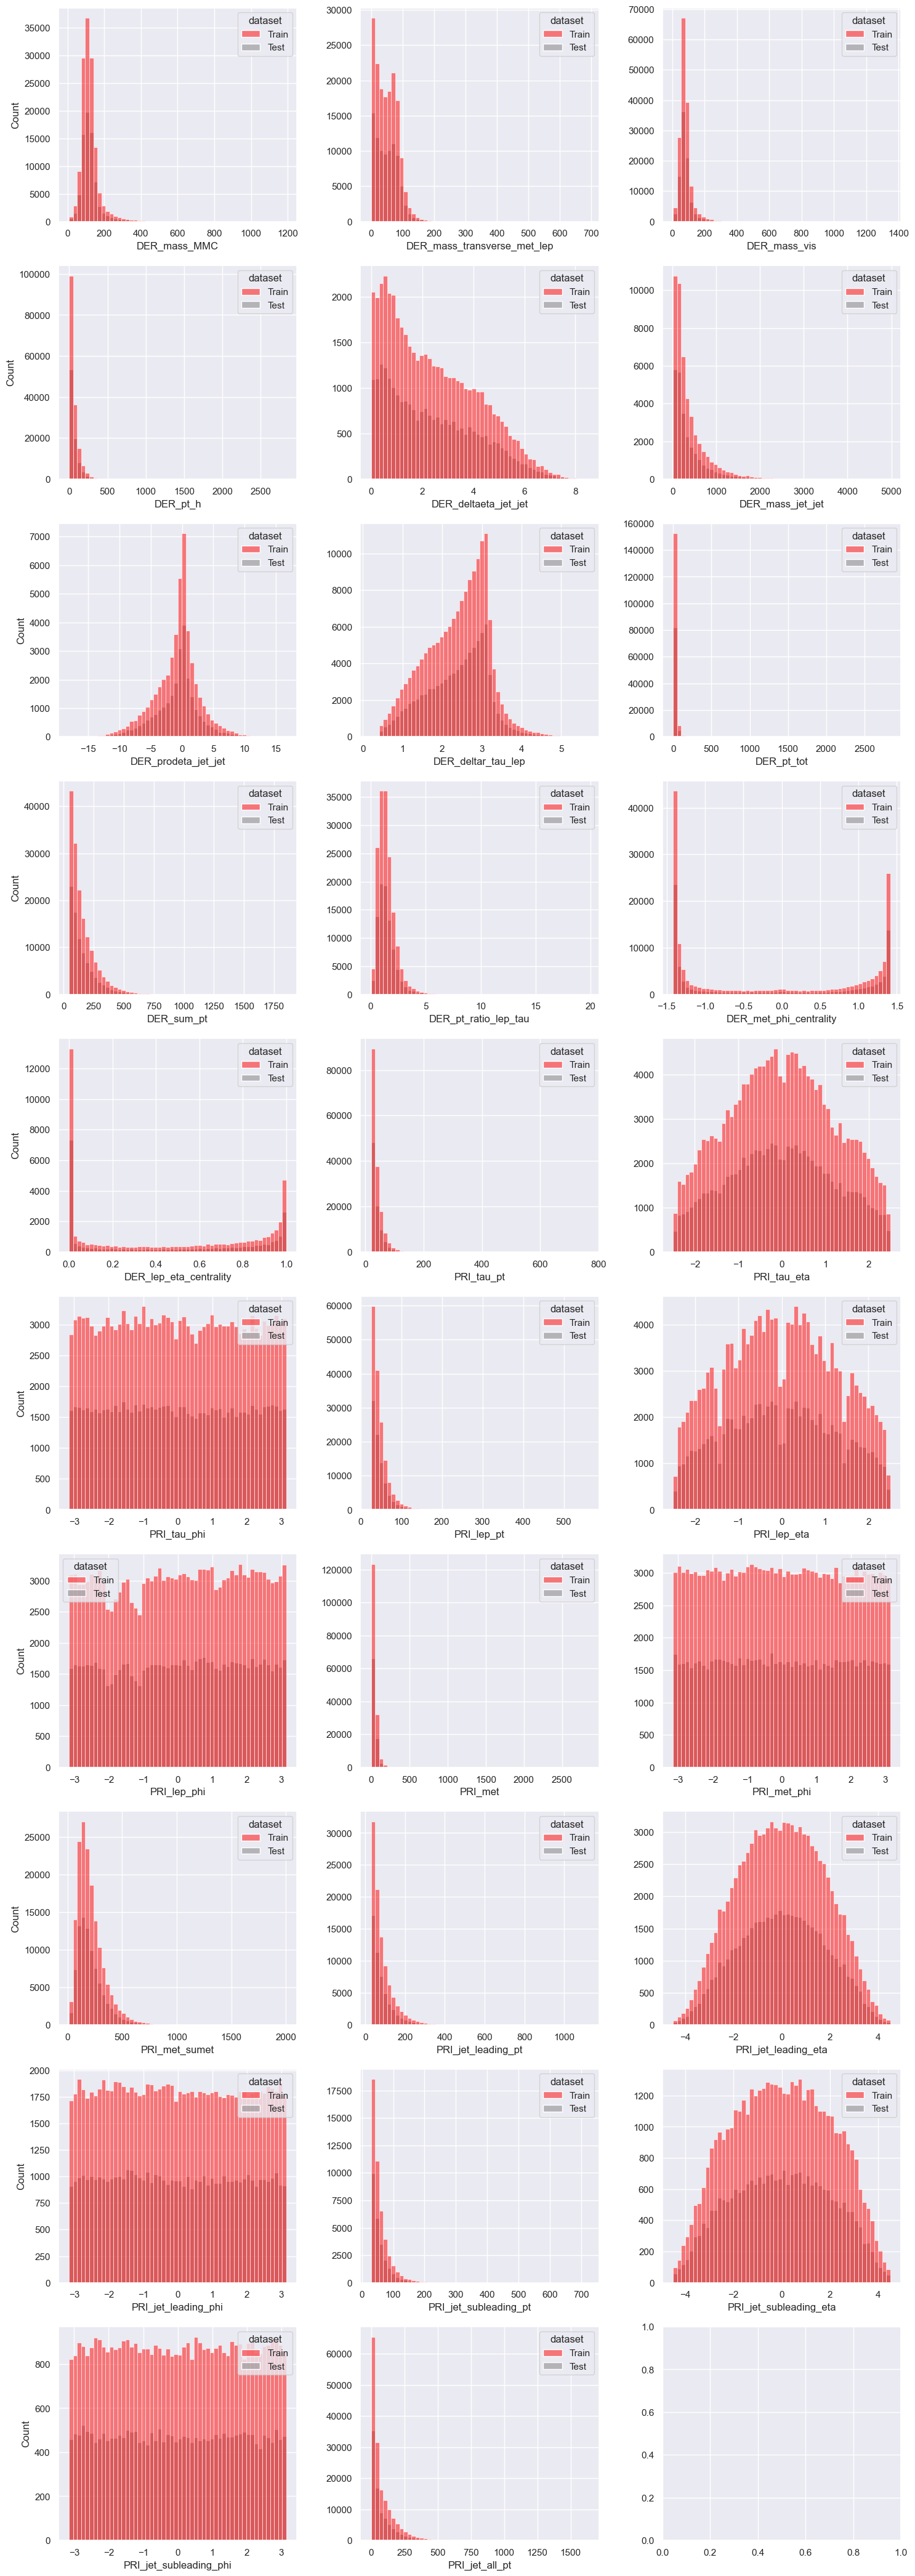

In [31]:
# Distributions of the float features
hist(data.replace(-999, np.nan),
     list(data_test.columns[data_test.dtypes == 'float64']),
     bins = max(math.floor(len(data_train)**(1/3)), math.floor(len(data_test)**(1/3))),
     ncols = 3)

#### Comparison of feature distributions by target class in the training set

Next we compare the univariate distributions of the features for the background events and the signal events in the training set. If a feature has reasonably different distributions corresponding to the background events and the signal events, then it is a clear indication that the feature is important in the task of classifying the events when the label is unknown. Similarly, if a feature has very similar distributions for the two target classes, then it is unlikely to help in the classification problem based on the feature alone. This, however, does not take into account the possible dependence the feature may have with other features which may turn out to be useful in the task of classification. To check that will require a multivariate analysis.

In [32]:
# Function to plot distributions of the float features in the training set by target class
def hist_target(df, cols, target, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = target, palette = ['red', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

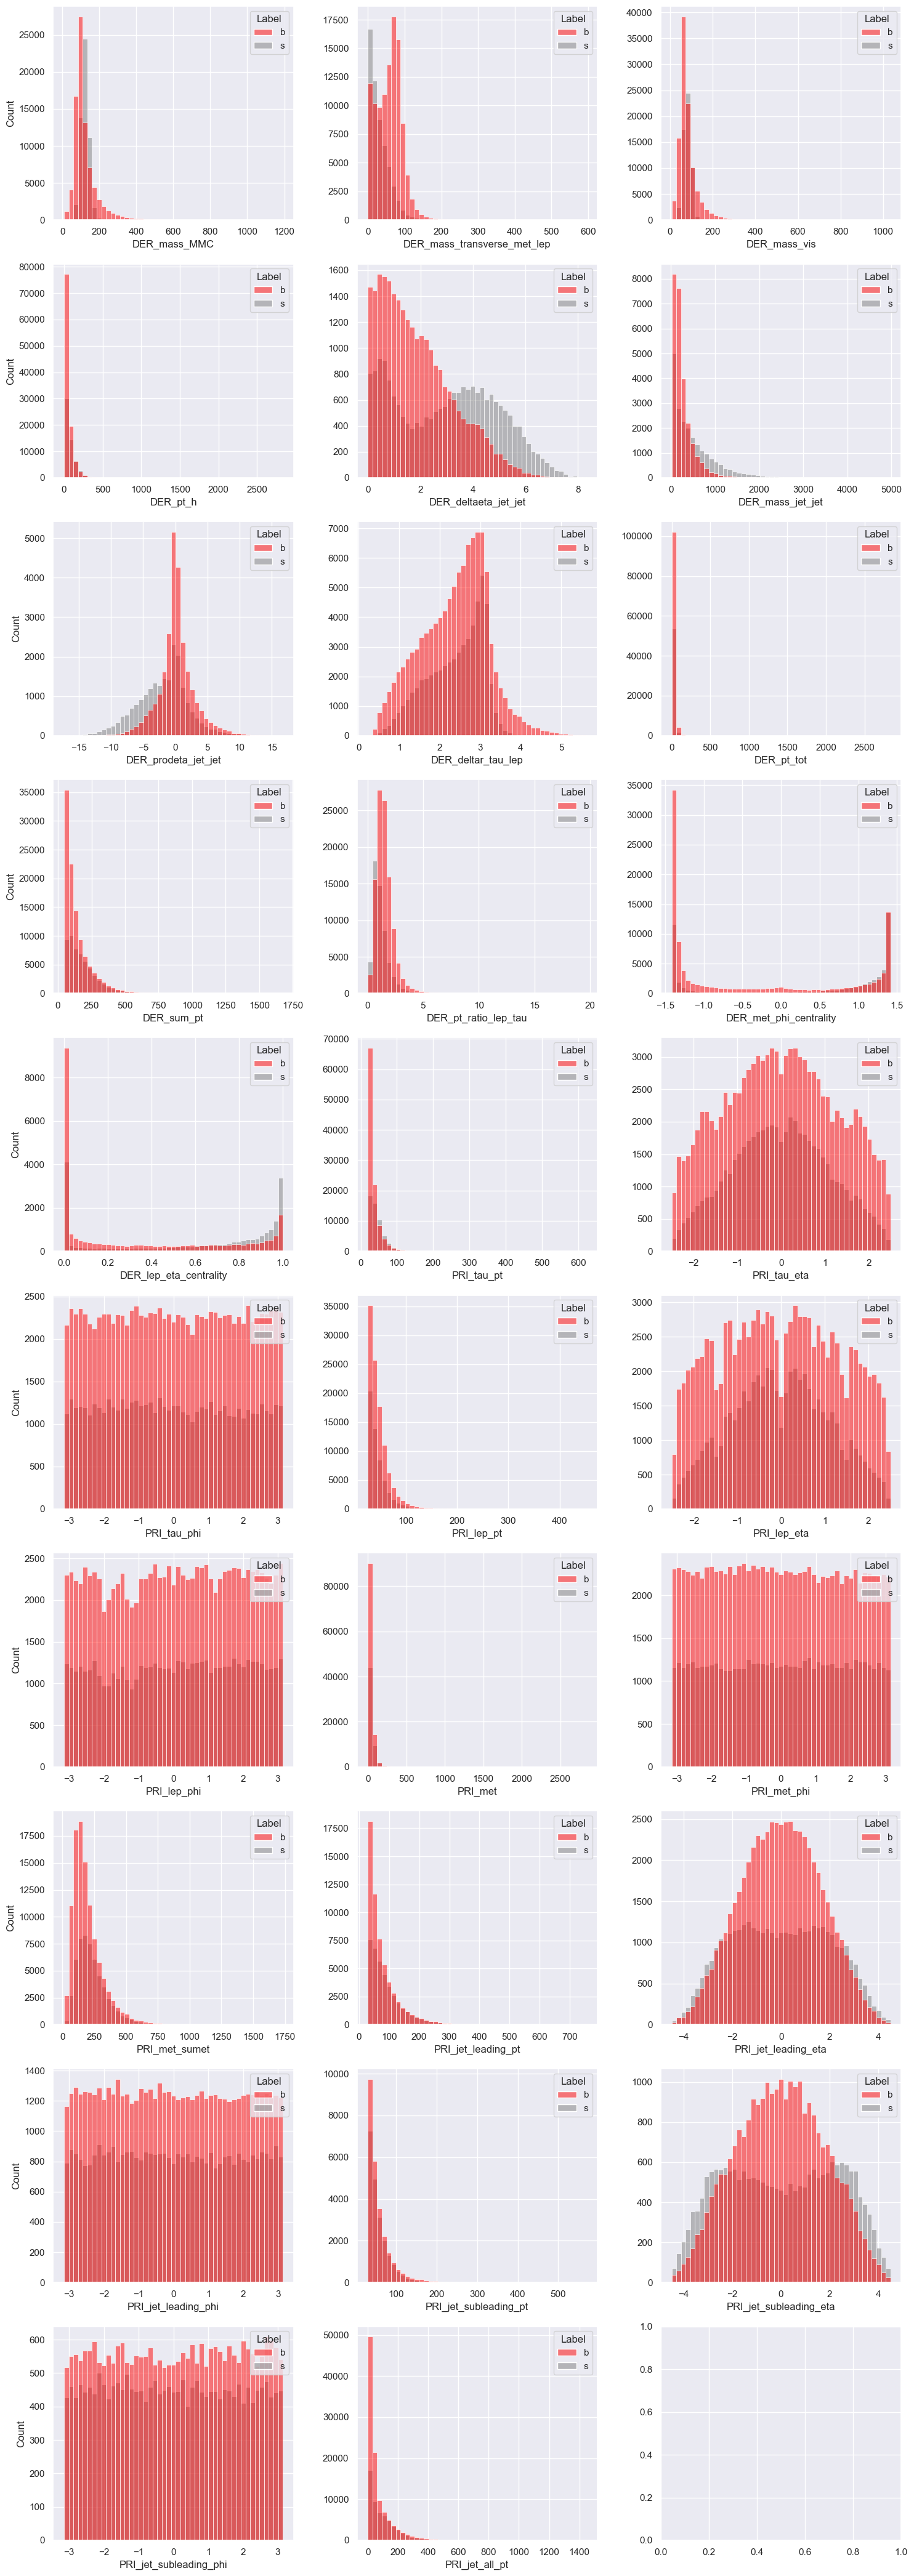

In [33]:
# Distributions of the float features in the training set by target class
hist_target(data_train.replace(-999, np.nan),
     list(data_test.columns[data_test.dtypes == 'float64']),
     target = 'Label',
     bins = max(math.floor(len(data_train_b)**(1/3)), math.floor(len(data_train_s)**(1/3))),
     ncols = 3)

#### Skewness

[Skewness](https://en.wikipedia.org/wiki/Skewness) quantifies the asymmetry of a distribution about its mean. It is given by

$$ g_1 := \frac{\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^3}{\left[\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right]^{3/2}}, $$

where $\bar{x}$ is the mean of the observations, given by $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$. The measure $g_1$ can be negative, zero, positive. A value close to $0$ suggests that the distribution is more or less symmetric. However, as it deviates from $0$, it becomes more and more skewed (either positively or negatively). A positive skewness indicates that the distribution is concentrated towards the left side, with the longer tail being on the right side. A negative skewness indicates that the distribution is concentrated towards the right side, with the longer tail being on the left side.

In [34]:
# Skewness of the float features
df_skew = pd.DataFrame()
cols_float_test = data_test.columns[data_test.dtypes == 'float64']
skew_train_b = data_train_b.replace(-999, np.nan)[cols_float_test].skew().values
skew_train_s = data_train_s.replace(-999, np.nan)[cols_float_test].skew().values
skew_train = data_train.replace(-999, np.nan)[cols_float_test].skew().values
skew_test = data_test.replace(-999, np.nan)[cols_float_test].skew().values
df_skew['Training set (background events)'], df_skew['Training set (signal events)'] = skew_train_b, skew_train_s
df_skew['Training set (all events)'], df_skew['Test set (all events)'] = skew_train, skew_test
df_skew.set_index(np.array(cols_float_test), inplace = True)
df_skew.style.set_caption("Skewness of the float features")

**Observations:**

- Columns with extreme positive skewness (absolute value greater than $3$ in the training set): `DER_mass_MMC`, `DER_mass_vis`, `DER_pt_tot`, `PRI_tau_pt`, `PRI_lep_pt`, `PRI_met`, `PRI_jet_subleading_pt` 
- Columns with high positive skewness (absolute value between $1$ and $3$ in the training set): `DER_mass_transverse_met_lep`, `DER_pt_h`, `DER_mass_jet_jet`, `DER_sum_pt`, `DER_pt_ratio_lep_tau`, `PRI_met_sumet`, `PRI_jet_leading_pt`, `PRI_jet_all_pt`
- Columns with moderate positive skewness (absolute value between $0.5$ and $1$ in the training set): `DER_deltaeta_jet_jet`

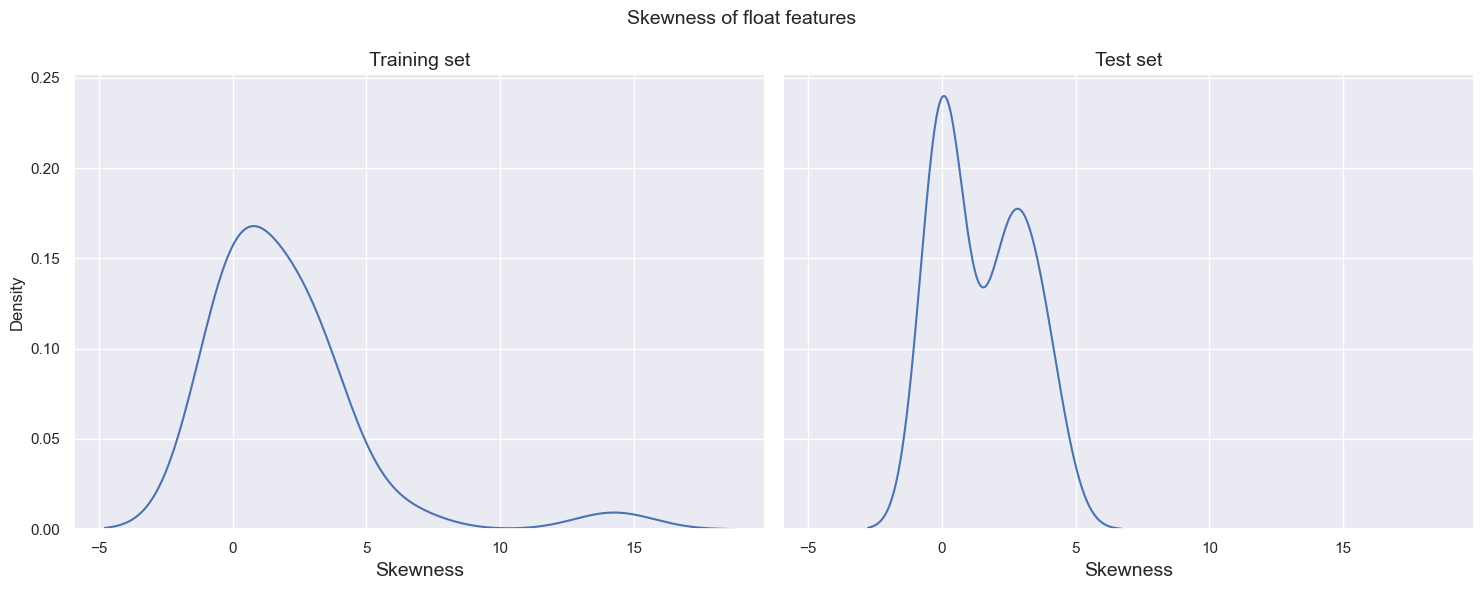

In [35]:
# Distribution of skewness of the float features in the training set and the test set
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_skew, x = 'Training set (all events)', ax = ax[0])
sns.kdeplot(data = df_skew, x = 'Test set (all events)', ax = ax[1])
ax[0].set_title("Training set", fontsize = 14)
ax[0].set_xlabel("Skewness", fontsize = 14)
ax[1].set_title("Test set", fontsize = 14)
ax[1].set_xlabel("Skewness", fontsize = 14)
plt.suptitle("Skewness of float features", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The skewness distribution for both the training set and the test set have global peak near $0$
- There is a mild peak far towards the right (around $11$) in the skewness distribution for the training set, indicating that some of the float features in the training set exhibit extremely high positive skewness
- The skewness distribution for the test set has a clear bimodal structure, with a local peak near $2.5$

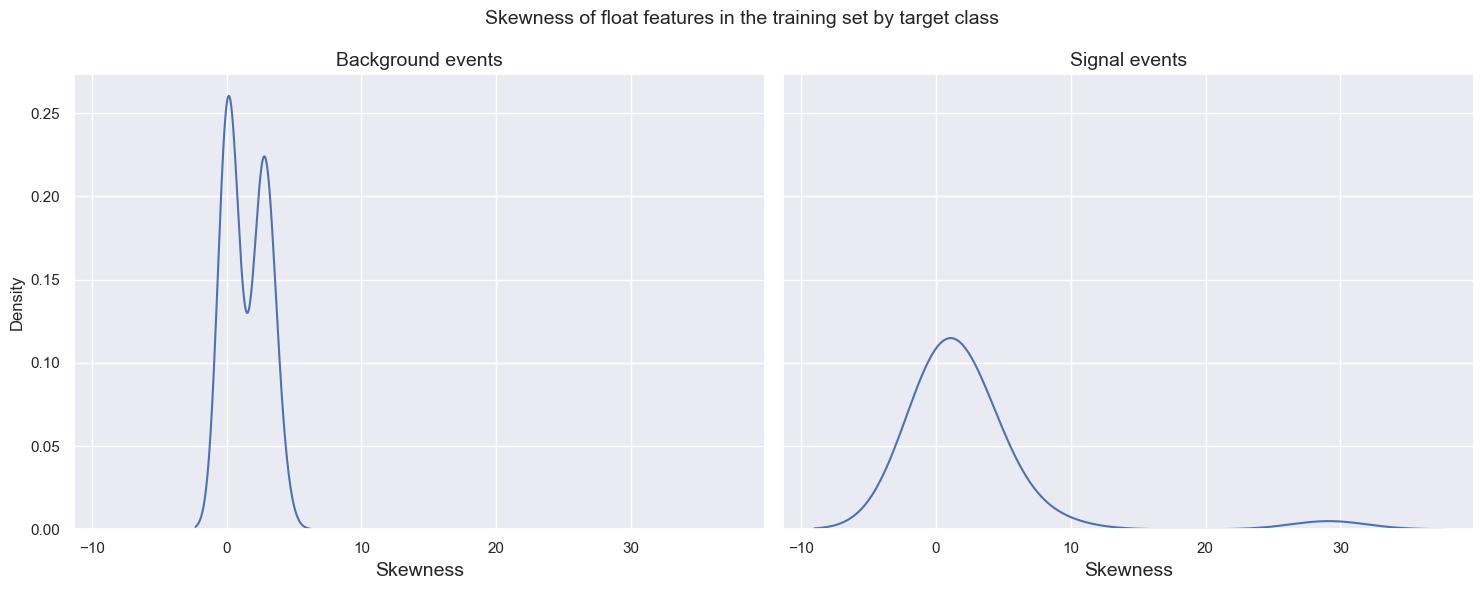

In [36]:
# Distribution of skewness of the float features in the training set by target class
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_skew, x = 'Training set (background events)', ax = ax[0])
sns.kdeplot(data = df_skew, x = 'Training set (signal events)', ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Skewness", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Skewness", fontsize = 14)
plt.suptitle("Skewness of float features in the training set by target class", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The skewness distribution for both the background events and the signal events in the training set have global peak near $0$
- There is a mild peak far towards the right (around $22$) in the skewness distribution for the signal events, indicating presence of float features with extreme positive skewness for the signal events
- The skewness distribution for the background events has a clear bimodal structure, with a local peak near $2.5$

#### Kurtosis

[Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) generally quantifies the peakedness and tailedness of a distribution. It is given by

$$ b_2 = \frac{\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^4}{\left[\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right]^2}, $$

where $\bar{x}$ is the mean of the observations, given by $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$. A relocated version of the kurtosis, taking into account the fact that $b_2 = 3$ for the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is defined as the [Excess kurtosis](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis), given by $g_2 := b_2 - 3$. The measure $g_2$ can be negative, zero, positive. A value close to $0$ suggests that the distribution has similar kurtosis as that of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). A positive excess kurtosis ([leptokurtic distribution](https://en.wikipedia.org/wiki/Kurtosis#Leptokurtic)) indicates that the distribution has more concentration towards the center or the tails, giving it a rather slender shape (*lepto-* literally means slender). On the other hand a negative excess kurtosis ([Platykurtic distribution](https://en.wikipedia.org/wiki/Kurtosis#Platykurtic)) indicates that the distribution has more concentration in the regions between the center and the tails, giving it a broad shape (*platy-* literally means *broad*).

**Note:** The ability of the measure $b_2$ or $g_2$ to quantify peakedness of a distribution has been a topic of debate. See [this paper](https://www.jstor.org/stable/24591697?seq=1) for more details.

In [37]:
# Kurtosis of the float features
df_kurt = pd.DataFrame()
kurt_train_b = data_train_b.replace(-999, np.nan)[cols_float_test].kurt().values
kurt_train_s = data_train_s.replace(-999, np.nan)[cols_float_test].kurt().values
kurt_train = data_train.replace(-999, np.nan)[cols_float_test].kurt().values
kurt_test = data_test.replace(-999, np.nan)[cols_float_test].kurt().values
df_kurt['Training set (background events)'], df_kurt['Training set (signal events)'] = kurt_train_b, kurt_train_s
df_kurt['Training set (all events)'], df_kurt['Test set (all events)'] = kurt_train, kurt_test
df_kurt.set_index(np.array(cols_float_test), inplace = True)
df_kurt.style.set_caption("Kurtosis of the float features")

**Observations:**

- Columns with extreme leptokurtosis (excess kurtosis greater than $3$ in the training set): `DER_mass_MMC`, `DER_mass_transverse_met_lep`, `DER_mass_vis`, `DER_pt_h`, `DER_mass_jet_jet`, `DER_pt_tot`, `DER_sum_pt`, `DER_pt_ratio_lep_tau`, `PRI_tau_pt`, `PRI_lep_pt`, `PRI_met`, `PRI_met_sumet`, `PRI_jet_leading_pt`, `PRI_jet_subleading_pt`, `PRI_jet_all_pt`
- Columns with high leptokurtosis (excess kurtosis between $1$ and $3$ in the training set): `DER_prodeta_jet_jet`
- Columns with high platykurtosis (excess kurtosis between $-3$ and $-1$ in the training set): `DER_met_phi_centrality`, `DER_lep_eta_centrality`, `PRI_tau_phi`, `PRI_lep_phi`, `PRI_met_phi`, `PRI_jet_leading_phi`, `PRI_jet_subleading_phi`
- Columns with moderate platykurtosis (excess kurtosis between $-1$ and $-0.5$ in the training set): `DER_deltaeta_jet_jet`, `PRI_tau_eta`, `PRI_lep_eta`, `PRI_jet_leading_eta`, `PRI_jet_subleading_eta`

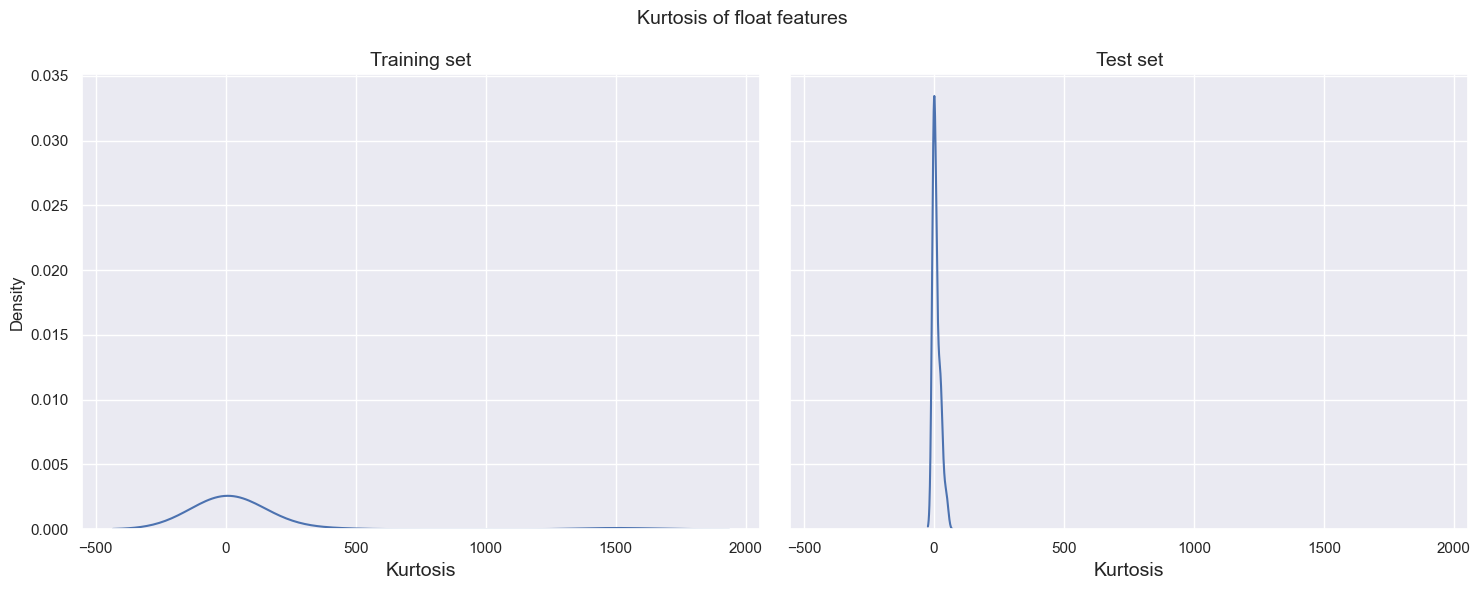

In [38]:
# Distribution of kurtosis of the float features
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_kurt, x = 'Training set (all events)', ax = ax[0])
sns.kdeplot(data = df_kurt, x = 'Test set (all events)', ax = ax[1])
ax[0].set_title("Training set", fontsize = 14)
ax[0].set_xlabel("Kurtosis", fontsize = 14)
ax[1].set_title("Test set", fontsize = 14)
ax[1].set_xlabel("Kurtosis", fontsize = 14)
plt.suptitle("Kurtosis of float features", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The kurtosis distribution for both the training set and the test set have global peak near $0$
- The kurtosis distribution for the training set is more or less bell-shaped and relatively dispersed, whereas the same for the test set is far more concentrated about $0$ with high peakedness

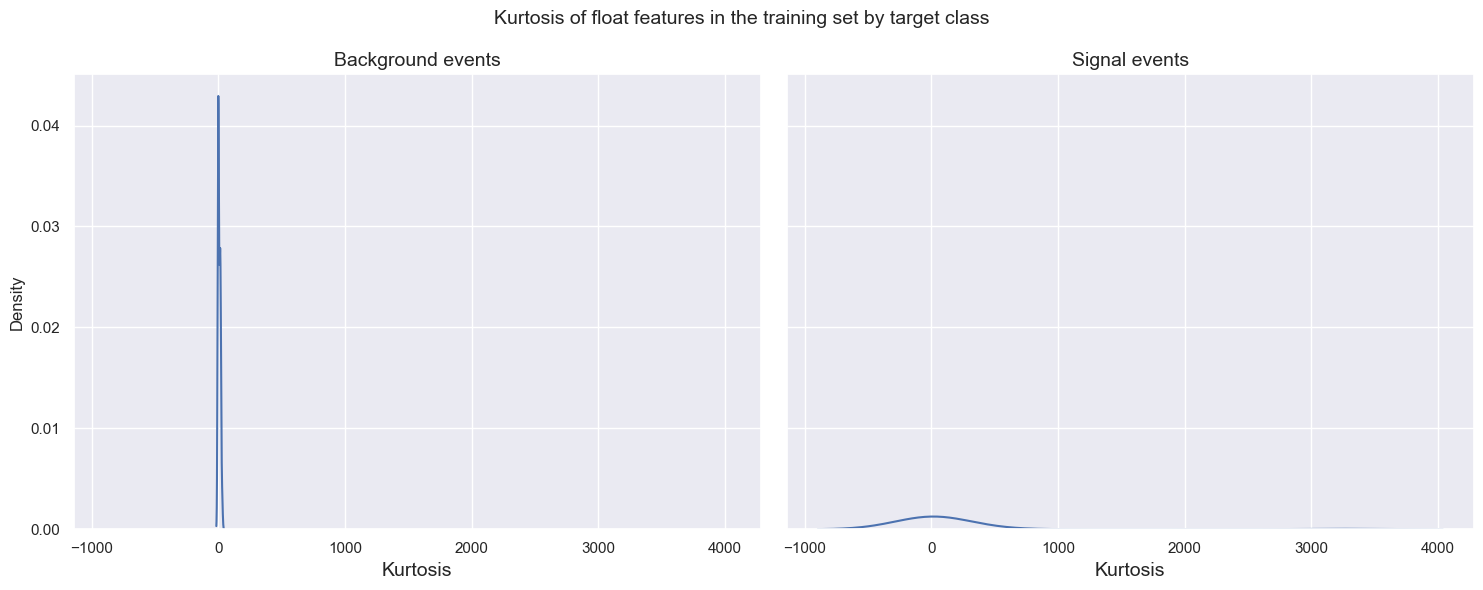

In [39]:
# Distribution of kurtosis of the float features in the training set by target class
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_kurt, x = 'Training set (background events)', ax = ax[0])
sns.kdeplot(data = df_kurt, x = 'Training set (signal events)', ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Kurtosis", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Kurtosis", fontsize = 14)
plt.suptitle("Kurtosis of float features in the training set by target class", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The kurtosis distribution for both the background events and the signal events in the training set have global peak near $0$
- The kurtosis distribution for the signal events is more or less bell-shaped and relatively dispersed, whereas the same for the background events is far more concentrated about $0$ with high peakedness

**Observation:** For both skewness and kurtosis, we see uncanny resemblance between the respective distribution plots for background events in the training set and all events in the test set. This indicates that majority of the observations in the test set may be background events.

### Integer feature

In [40]:
# Donutplots
def donut(df1, df2, col,text1, text2, title_text = "Title"):
    fig = make_subplots(rows = 1, cols = 2, column_widths = [0.5, 0.5], row_heights = [0.5], specs = [[ {"type": "pie"}, {"type": "pie"}]])
    fig.add_trace(go.Pie(labels = df1[col].value_counts().index, values = df1[col].value_counts(), legendgroup = "group", textinfo = 'percent', hole = 0.3, title = dict(text = text1)), row = 1, col = 1)
    fig.add_trace(go.Pie(labels = df2[col].value_counts().index, values = df2[col].value_counts(), legendgroup = "group", textinfo = 'percent', hole = 0.3, title = dict(text = text2)), row = 1, col = 2)
    fig.update_layout(title = dict(text = title_text, y = 0.9, x = 0.5, xanchor = 'center', yanchor = 'top'))
    fig.show()

In [41]:
# Frequency comparison of PRI_jet_num for the training set and the test set
donut(data_train, data_test, col = 'PRI_jet_num', text1 = 'Train', text2 = 'Test', title_text = "Frequency comparison of PRI_jet_num")

**Observation:** The proportions of values of `PRI_jet_num` are more or less same for both the training set and the test set

In [42]:
# Frequency comparison of PRI_jet_num for the background events and the signal events in the training set
donut(data_train_b, data_train_s, col = 'PRI_jet_num', text1 = 'Background', text2 = 'Signal', title_text = "Frequency comparison of PRI_jet_num in the training set by target class")

**Observation:** The proportions of values of `PRI_jet_num`, especially $0$ and $2$, differ for the background events and the signal events in the training set

# 4. Multivariate Analysis

- Correlation structure of float features
- Bivariate scatterplots
- Trivariate scatterplots

## 4.1. Correlation structure of float features

[Correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a statistical measure of linear dependence between two variables. Extreme correlation gives an indication that the two variables are linearly related, however this does not prove any causal relationship between the said variables. The measure is defined as the covariance of the two variables, scaled by the product of respective standard deviations. Let $\left\{\left(x_1, y_1\right), \left(x_2, y_2\right), \cdots, \left(x_n, y_n\right)\right\}$ be paired data on the variables $\left(x, y\right)$. Then the correlation coefficient of the two variables is given by
$$ r_{xy} := \frac{\text{cov}\left(x, y\right)}{s_x s_y} = \frac{\frac{1}{n}\sum_{i=1}^n\left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sqrt{\frac{1}{n}\sum_{i=1}^n\left(x_i - \bar{x}\right)^2} \sqrt{\frac{1}{n}\sum_{i=1}^n\left(y_i - \bar{y}\right)^2}},$$

where $\bar{x}$ and $\bar{y}$ denote the respective sample means of the two variables, given by $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ and $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$.

In [43]:
# Correlation coefficients of pairs of float features
df_corr = pd.DataFrame(columns = ['feature_1', 'feature_2', 'Training set (background events)', 'Training set (signal events)', 'Training set (all events)', 'Test set (all events)'])
cols = cols_float_test
for i in range(len(cols)):
    for j in range(len(cols)):
        if i<j:
            df_corr.loc[len(df_corr.index)] = [cols[i], cols[j], data_train_b[cols[i]].corr(data_train_b[cols[j]]), data_train_s[cols[i]].corr(data_train_s[cols[j]]), data_train[cols[i]].corr(data_train[cols[j]]), data_test[cols[i]].corr(data_test[cols[j]])]
df_corr.sort_values(by = 'Training set (all events)', ascending = False, inplace = True)
df_corr # df_corr.style.set_caption("Correlation coefficient of pairs of float features")

feature_1                    feature_2  \
113    DER_deltaeta_jet_jet       DER_lep_eta_centrality   
284  DER_lep_eta_centrality       PRI_jet_subleading_phi   
283  DER_lep_eta_centrality       PRI_jet_subleading_eta   
128    DER_deltaeta_jet_jet       PRI_jet_subleading_phi   
127    DER_deltaeta_jet_jet       PRI_jet_subleading_eta   
..                      ...                          ...   
176      DER_deltar_tau_lep                   DER_sum_pt   
195      DER_deltar_tau_lep               PRI_jet_all_pt   
0              DER_mass_MMC  DER_mass_transverse_met_lep   
237    DER_pt_ratio_lep_tau                   PRI_tau_pt   
84                 DER_pt_h           DER_deltar_tau_lep   

     Training set (background events)  Training set (signal events)  \
113                          0.999999                      0.999998   
284                          0.999998                      0.999997   
283                          0.999998                      0.999996   
128                          0.999997                      0.999994   
127                          0.999997                      0.999993   
..                                ...                           ...   
176                         -0.299140                     -0.755012   
195                         -0.334977                     -0.732152   
0                           -0.412245                     -0.476252   
237                         -0.433603                     -0.501046   
84                          -0.422392                     -0.813043   

     Training set (all events)  Test set (all events)  
113                   0.999998               0.999998  
284                   0.999998               0.999998  
283                   0.999997               0.999997  
128                   0.999996               0.999996  
127                   0.999995               0.999995  
..                         ...                    ...  
176                  -0.434004              -0.430050  
195                  -0.449879              -0.446654  
0                    -0.455789              -0.455686  
237                  -0.479353              -0.466232  
84                   -0.539461              -0.539230  

[406 rows x 6 columns]

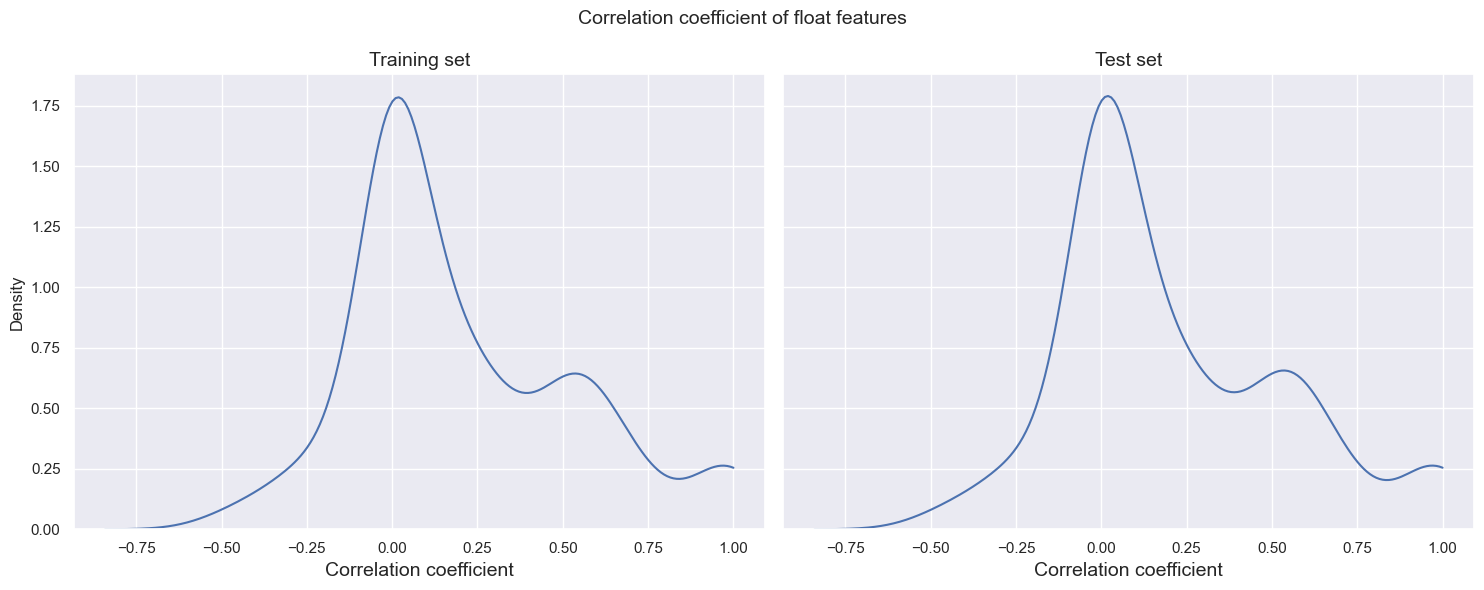

In [44]:
# Distribution of correlation coefficient of pairs of float features
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_corr, x = 'Training set (all events)', clip = (-1.0, 1.0), ax = ax[0])
sns.kdeplot(data = df_corr, x = 'Test set (all events)', clip = (-1.0, 1.0), ax = ax[1])
ax[0].set_title("Training set", fontsize = 14)
ax[0].set_xlabel("Correlation coefficient", fontsize = 14)
ax[1].set_title("Test set", fontsize = 14)
ax[1].set_xlabel("Correlation coefficient", fontsize = 14)
plt.suptitle("Correlation coefficient of float features", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The correlation distribution is almost identical for the training set and the test set
- The density has its global peak near $0$, however there is a local peak between $0.5$ and $0.6$, indicating a fair number of moderately to highly correlated pairs of features
- There is even an increase in the density after $0.8$, with a small peak very close to $1$, indicating the presence of a few extremely correlated pairs of features

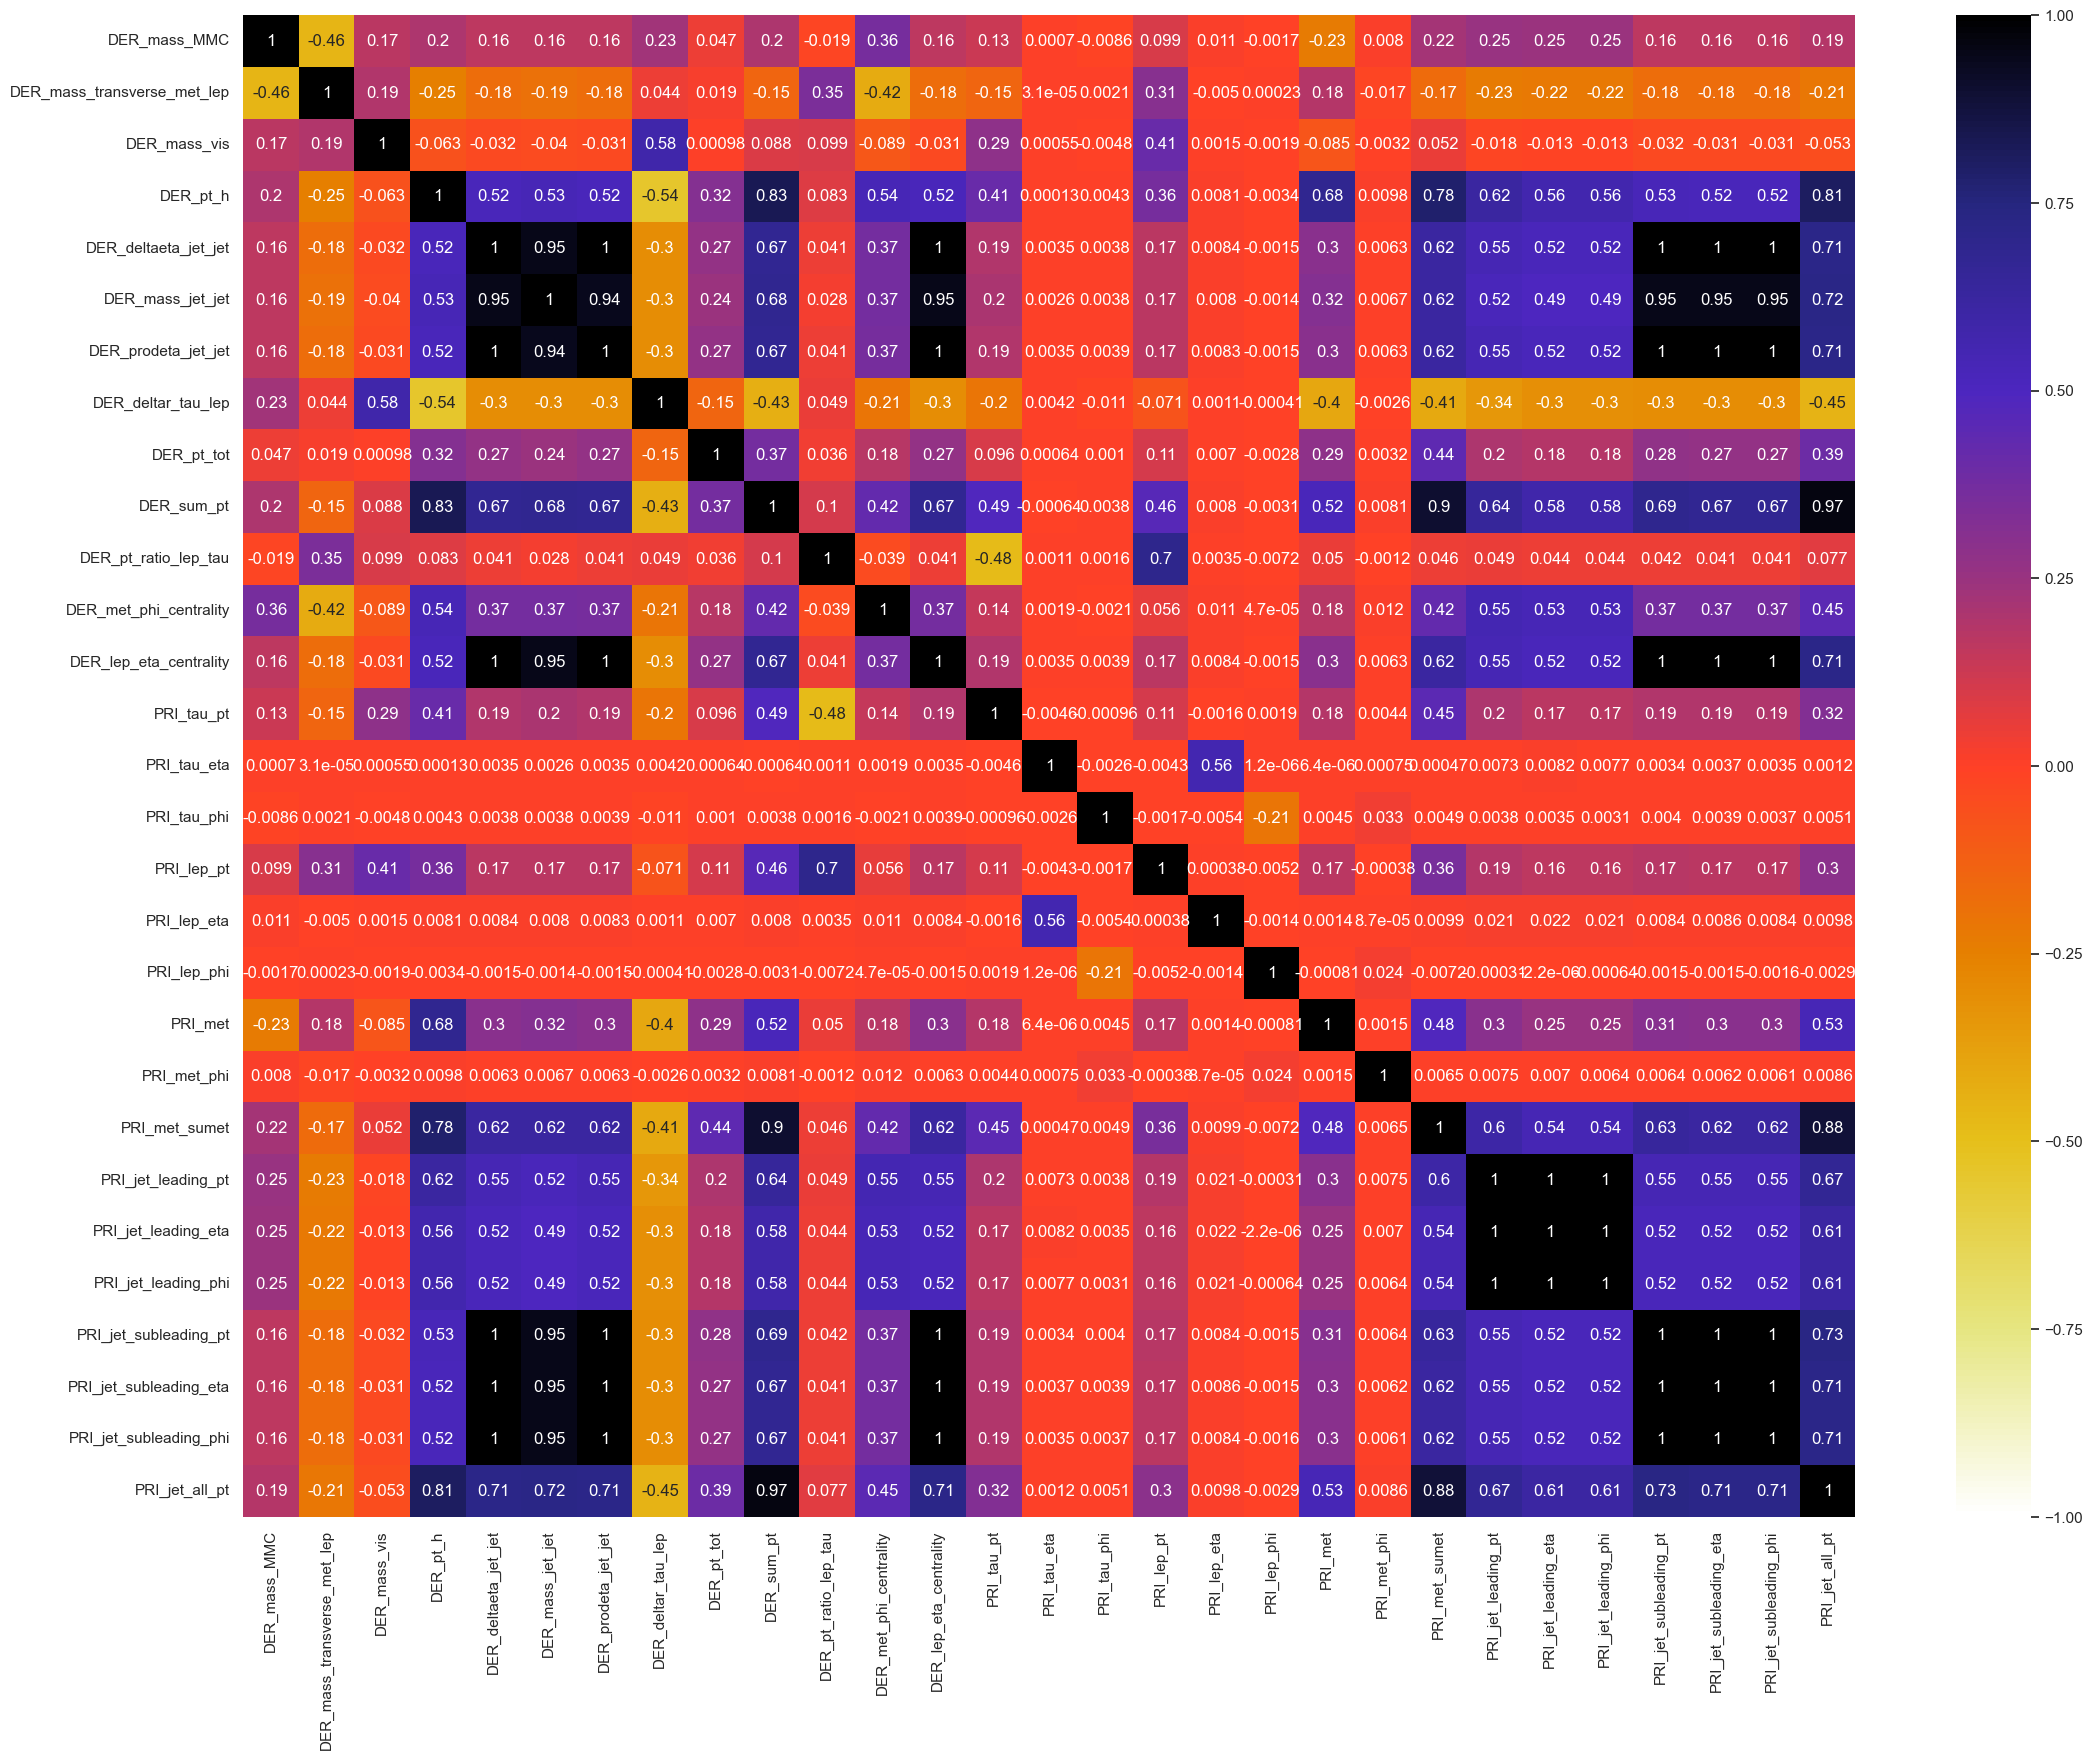

In [45]:
# Correlation heatmap of float features for the training set
plt.figure(figsize = (26, 19.5))
sns.heatmap(data_train[cols_float_test].corr(), vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

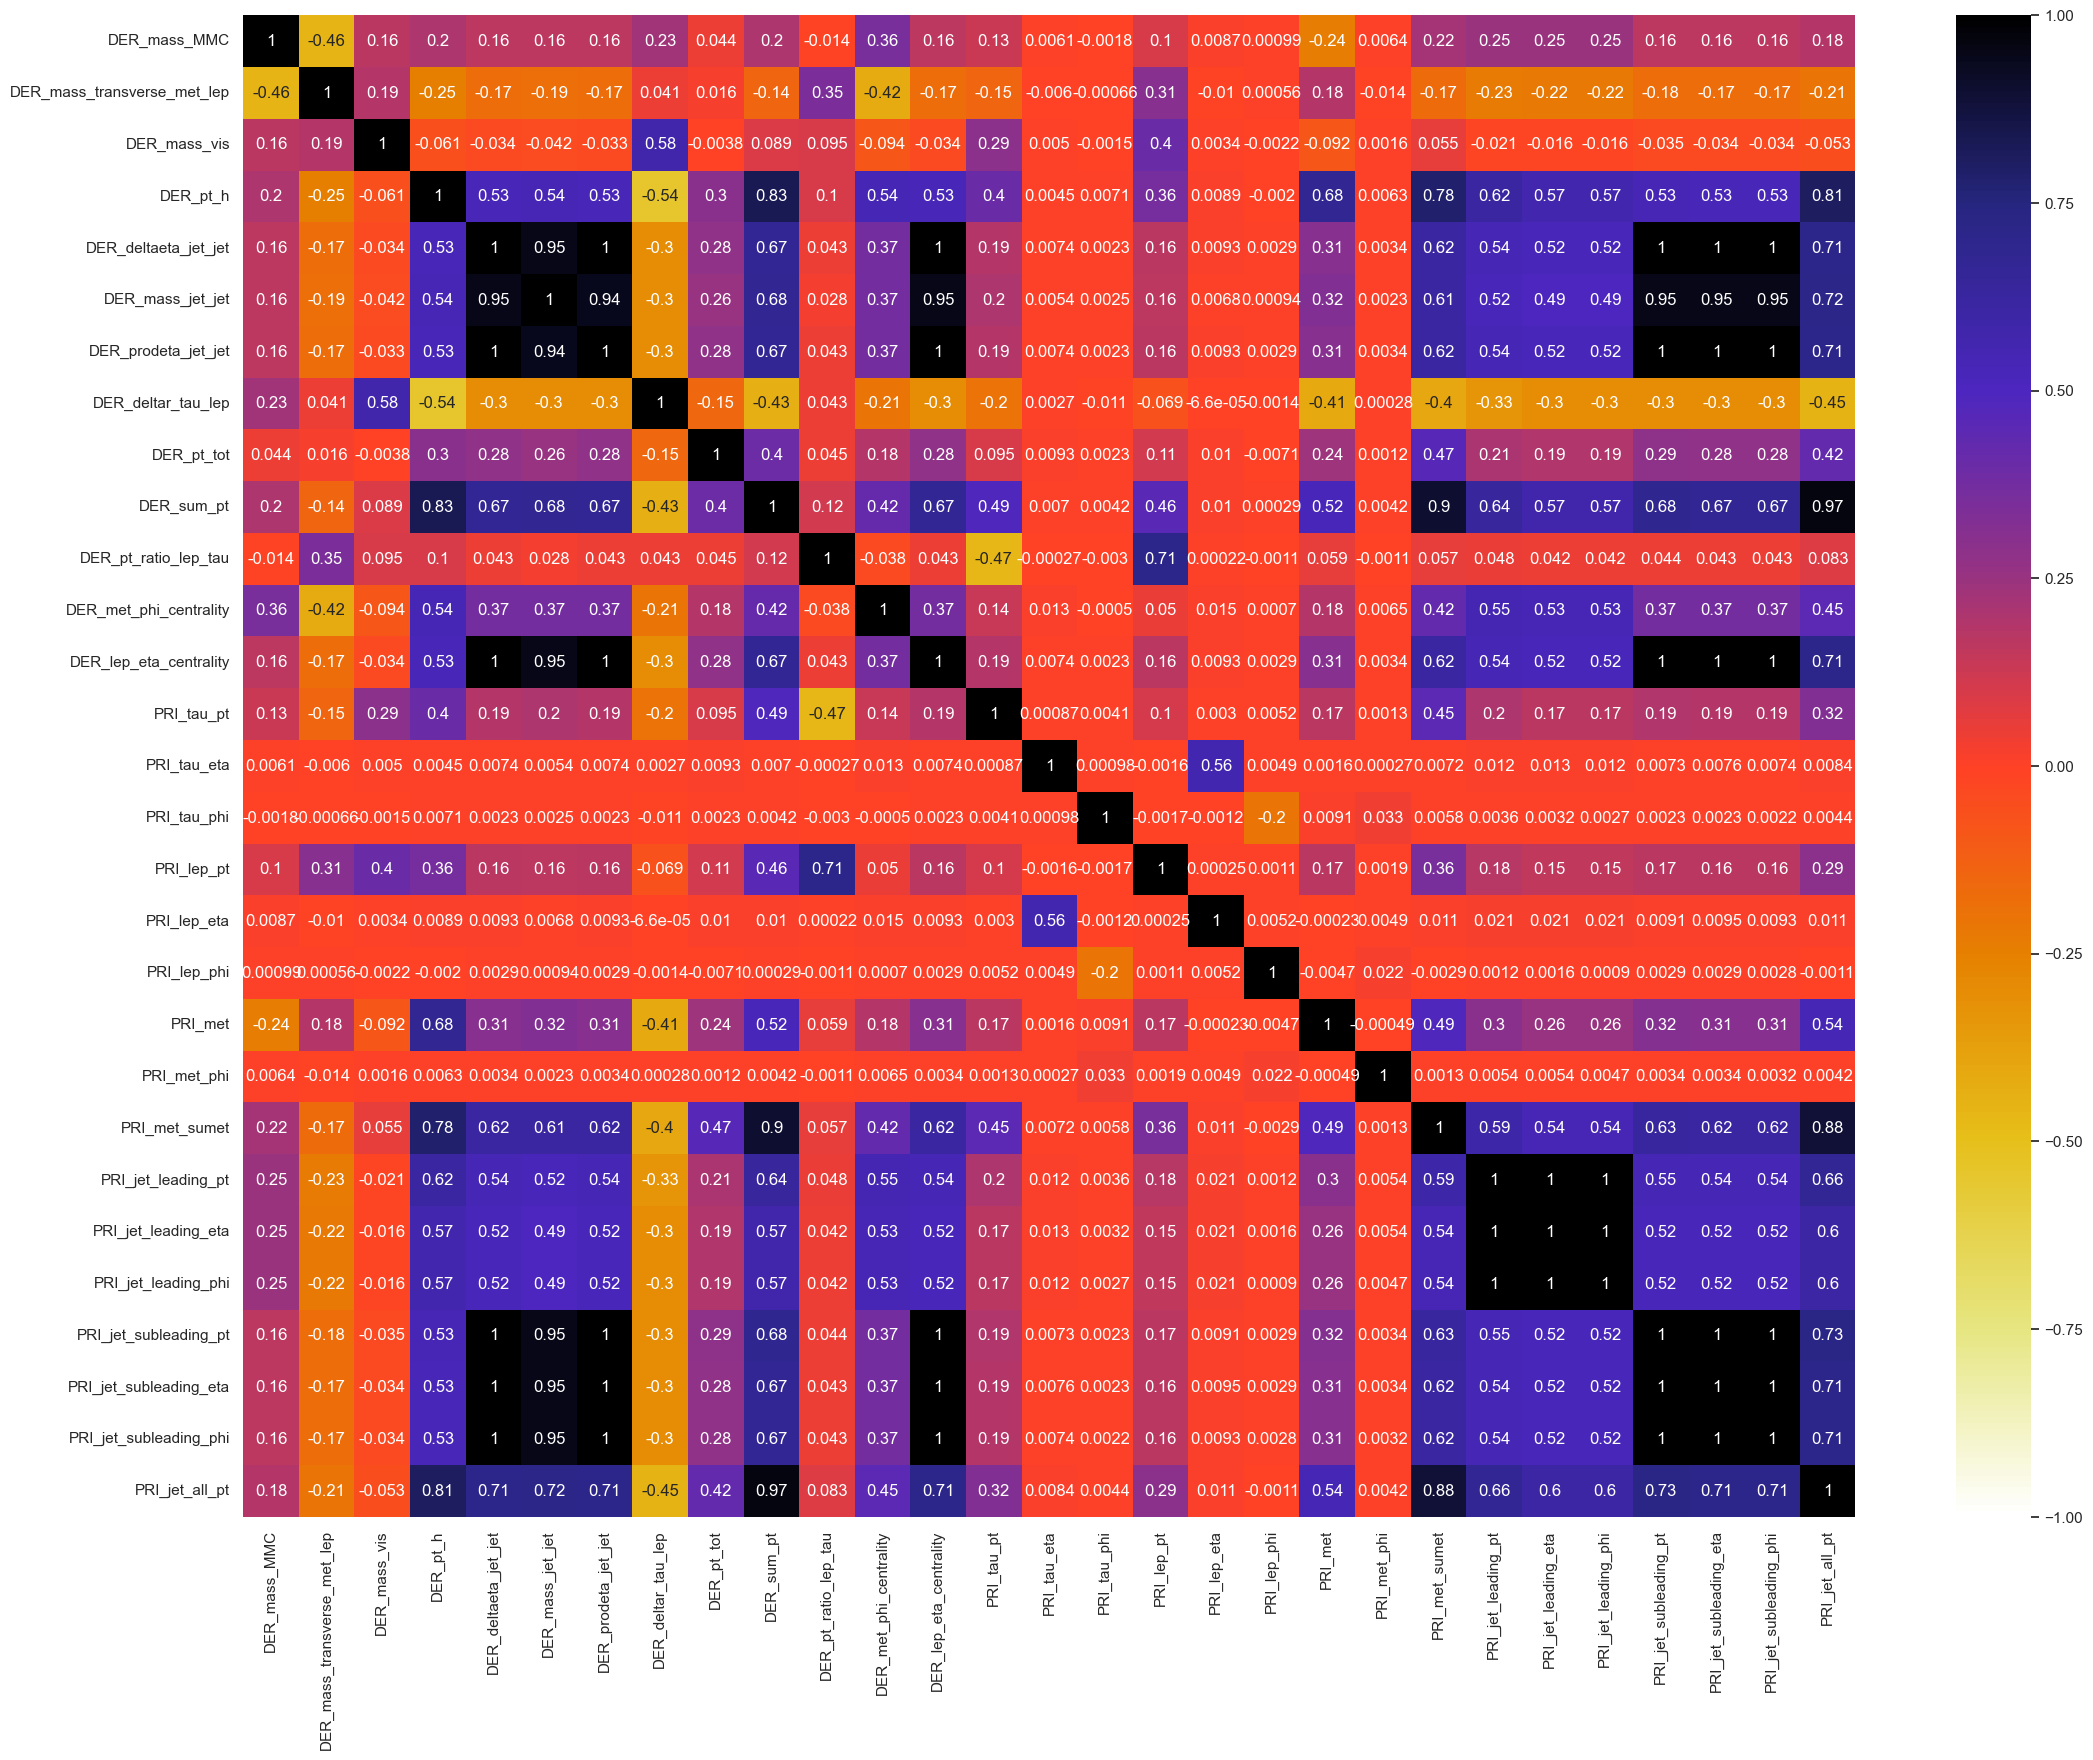

In [46]:
# Correlation heatmap of float features for the test set
plt.figure(figsize = (26, 19.5))
sns.heatmap(data_test[cols_float_test].corr(), vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

**Observation:** The following groups have shown extremely high positive correlation structure within themselves, i.e. any two features from a single group has extremely high correlation coefficient.

- `DER_deltaeta_jet_jet`, `DER_mass_jet_jet`, `DER_prodeta_jet_jet`, `DER_lep_eta_centrality`, `PRI_jet_subleading_pt`, `PRI_jet_subleading_eta`, `PRI_jet_subleading_phi`
- `DER_sum_pt`, `PRI_met_sumet`, `PRI_jet_all_pt`
- `PRI_jet_leading_pt`, `PRI_jet_leading_eta`, `PRI_jet_leading_phi`

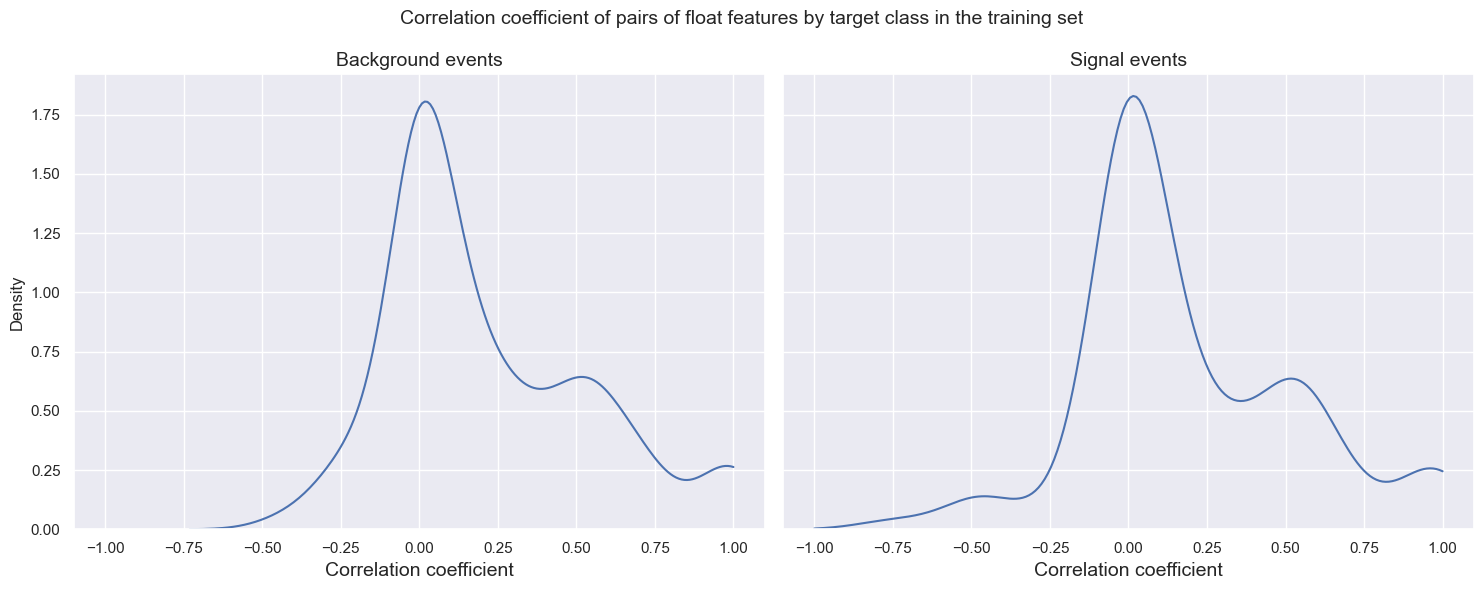

In [47]:
# Distribution of correlation coefficient of pairs of float features by target class in the training set
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_corr, x = 'Training set (background events)', clip = (-1.0, 1.0), ax = ax[0])
sns.kdeplot(data = df_corr, x = 'Training set (signal events)', clip = (-1.0, 1.0), ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Correlation coefficient", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Correlation coefficient", fontsize = 14)
plt.suptitle("Correlation coefficient of pairs of float features by target class in the training set", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The left tail of the correlation distributions corresponding to background events and signal events in the training set are different
- The densities have their respective global peaks near $0$, however there is a local peak between $0.5$ and $0.6$ for both of them, indicating a fair number of pairs of float features with moderate to high positive correlation
- The left tail of the correlation distribution for the signal events is heavier compared to the same for the background events, indicating that there are more pairs of float features with moderate to high negative correlation for the signal events than the background events in the training set
- For both target classes, there is an increase in the density after $0.8$, with a small peak very close to $1$, indicating the presence of a few pairs of float features with extreme positive correlation

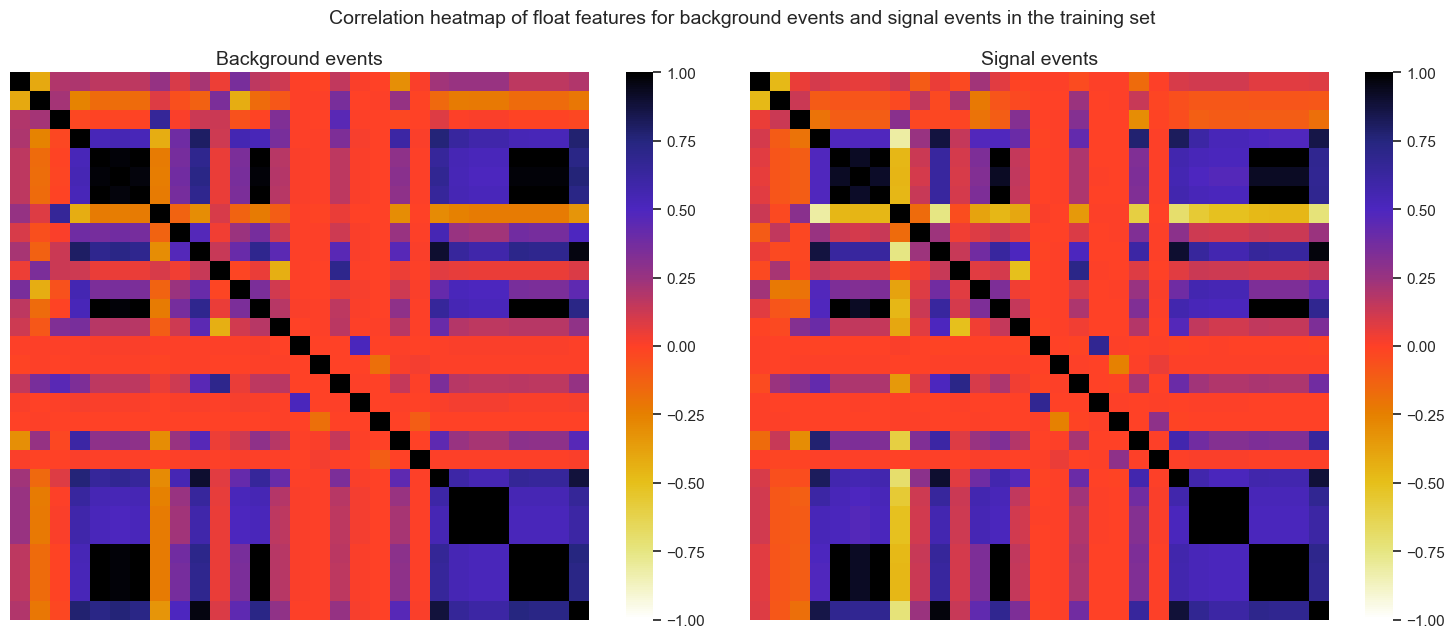

In [48]:
# Correlation heatmap of float features for background events and signal events in the training set
fig, ax = plt.subplots(1, 2, figsize = (15, 6.5), sharex = True, sharey = True)
sns.heatmap(data_train_b[cols_float_test].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[0])
sns.heatmap(data_train_s[cols_float_test].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
plt.suptitle("Correlation heatmap of float features for background events and signal events in the training set", fontsize = 14)
plt.tight_layout()
plt.show()

**Observation:** The two heatmaps are more or less similar, i.e. the overall correlation structure of the float features corresponding to the background events and the signal events in the training set are very much alike.

## 4.2. Bivariate scatterplots

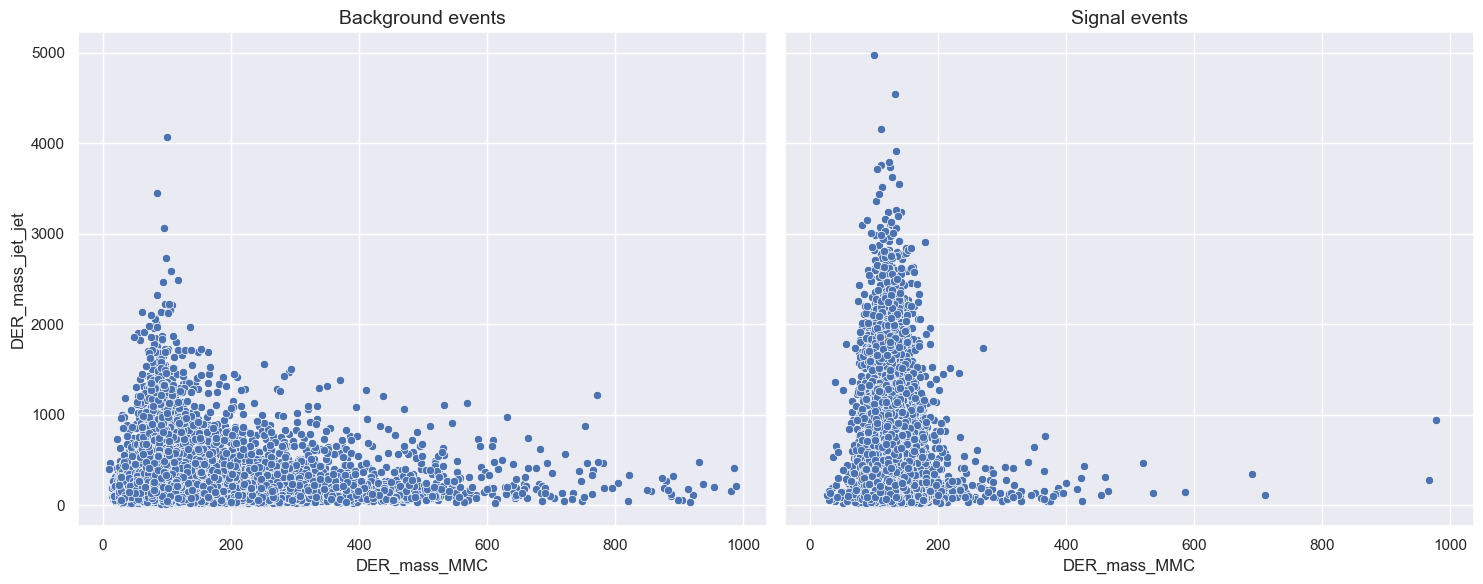

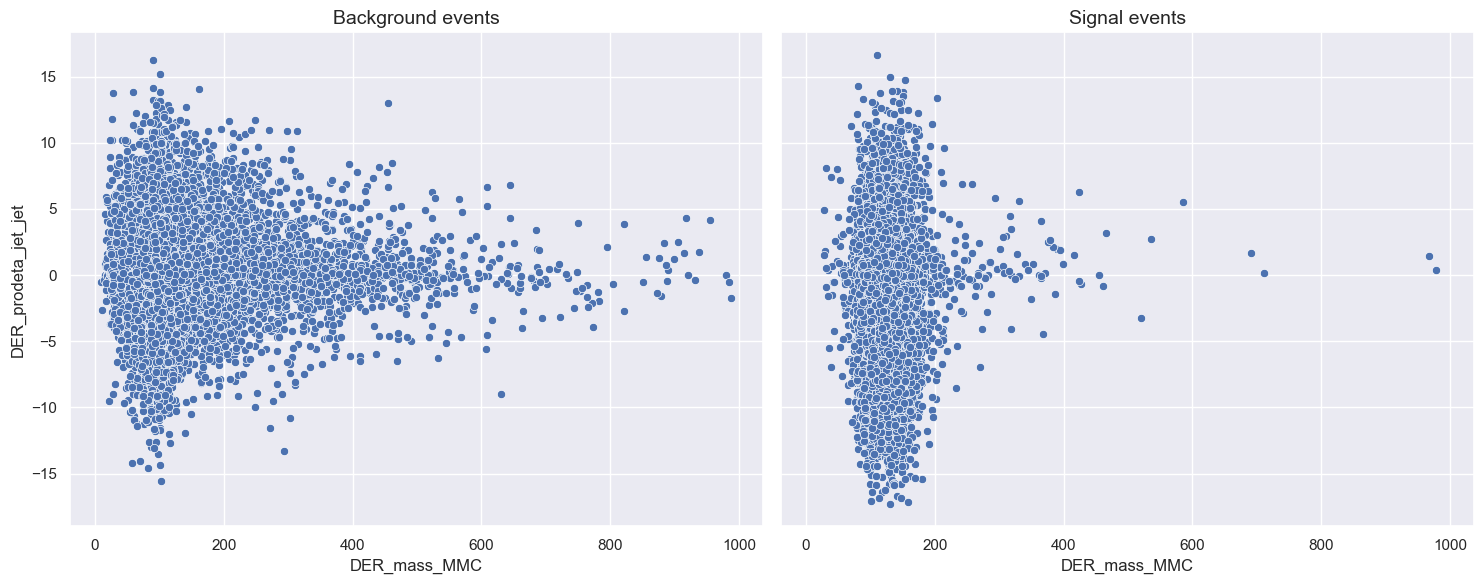

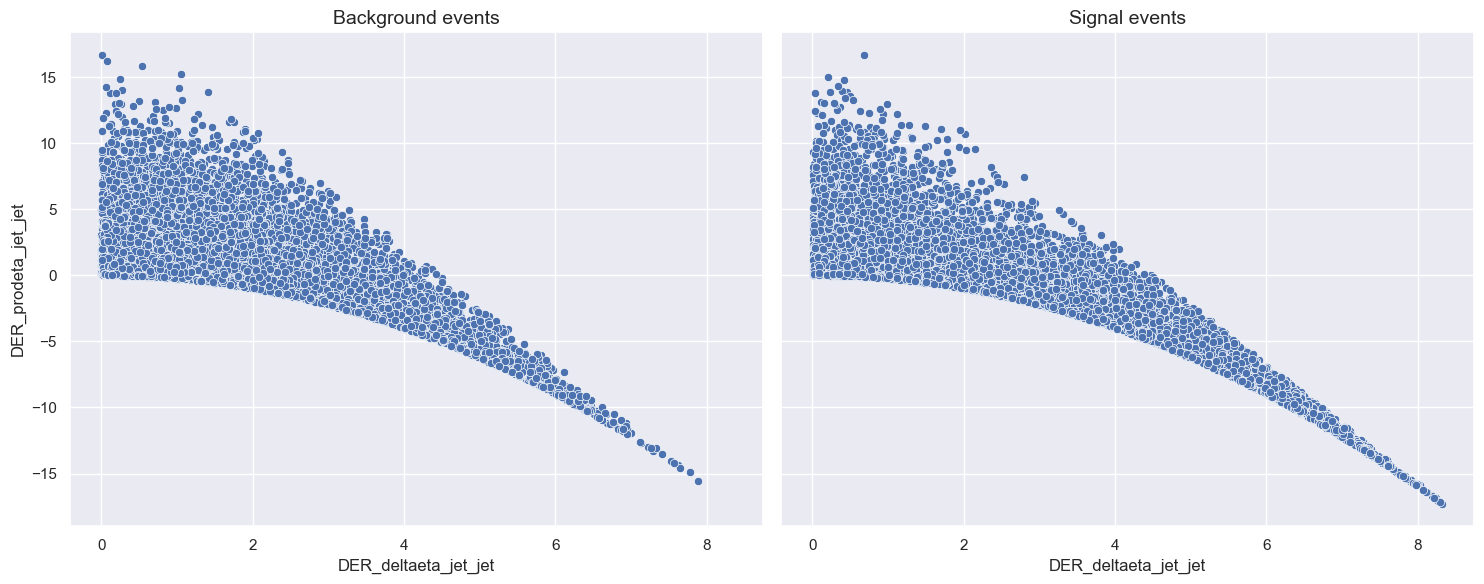

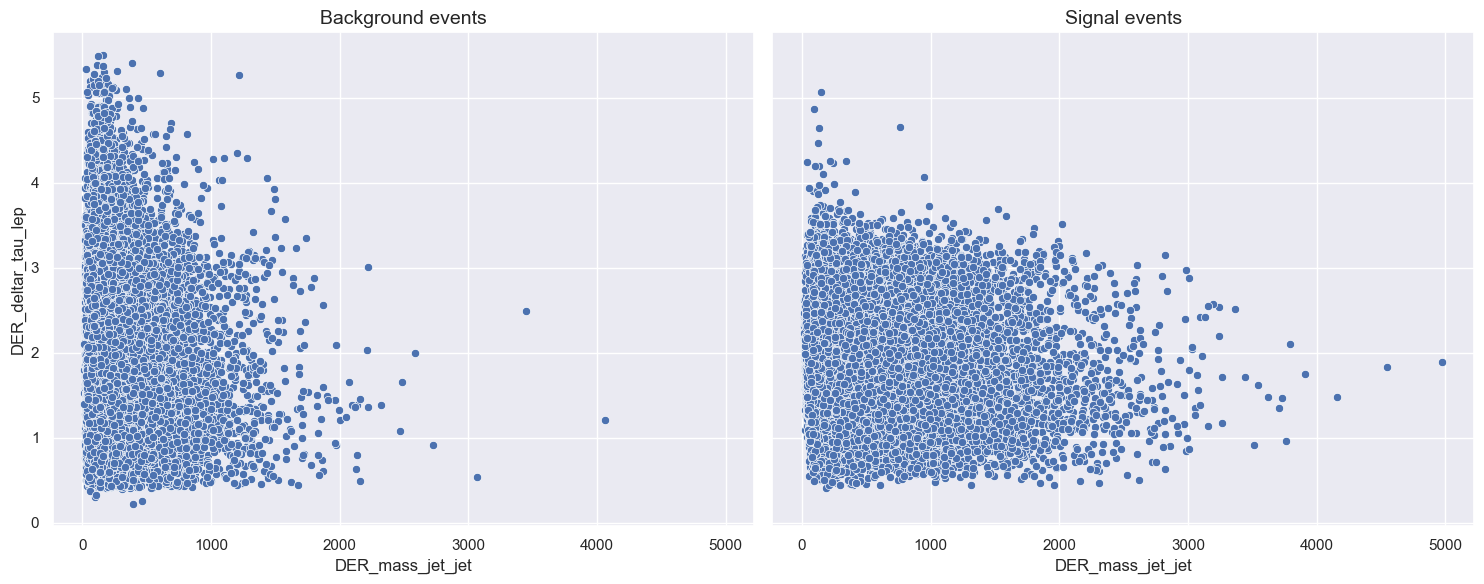

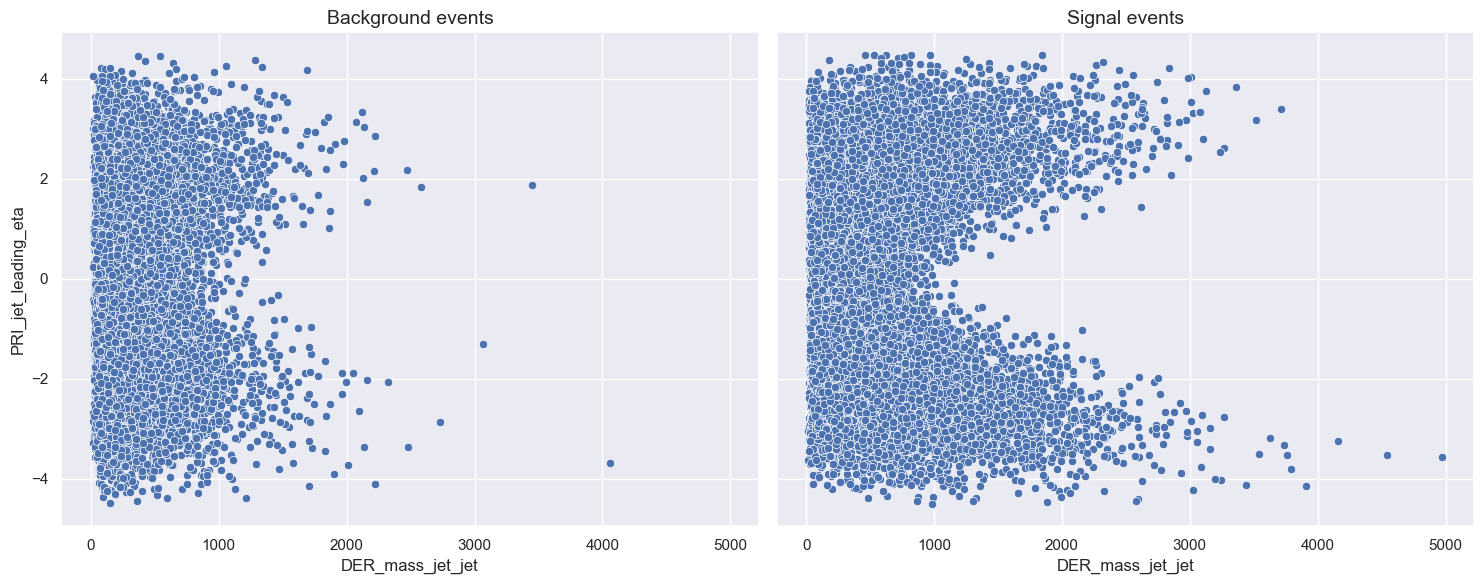

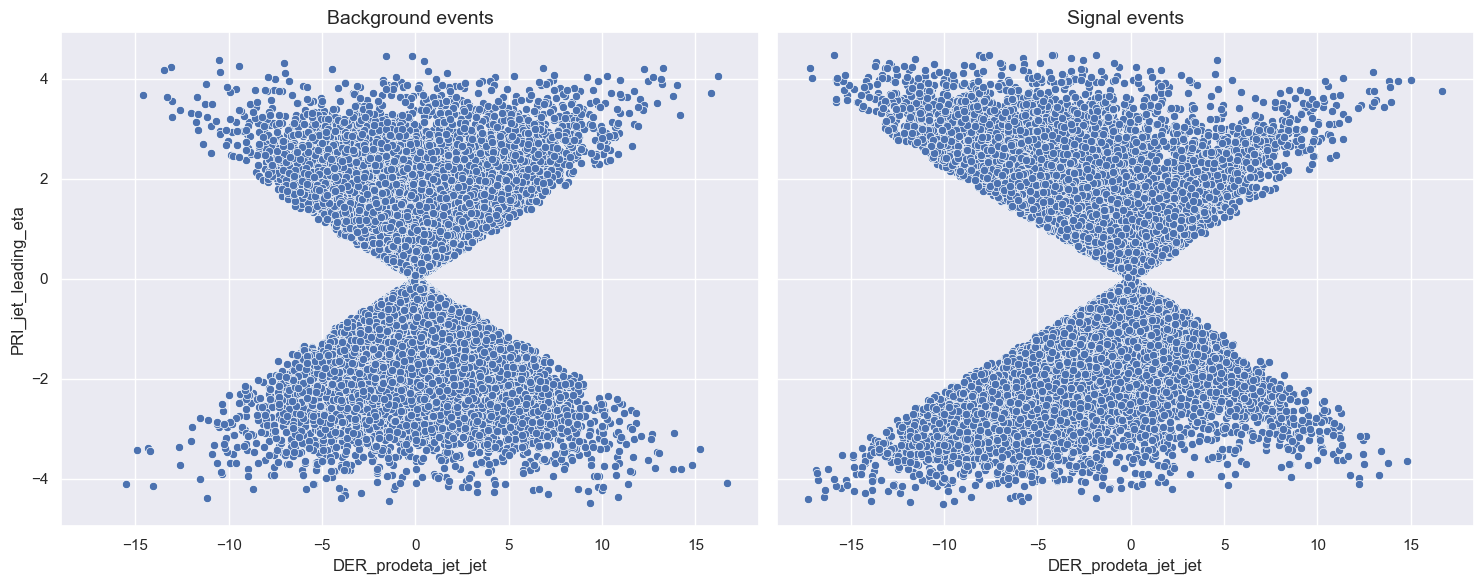

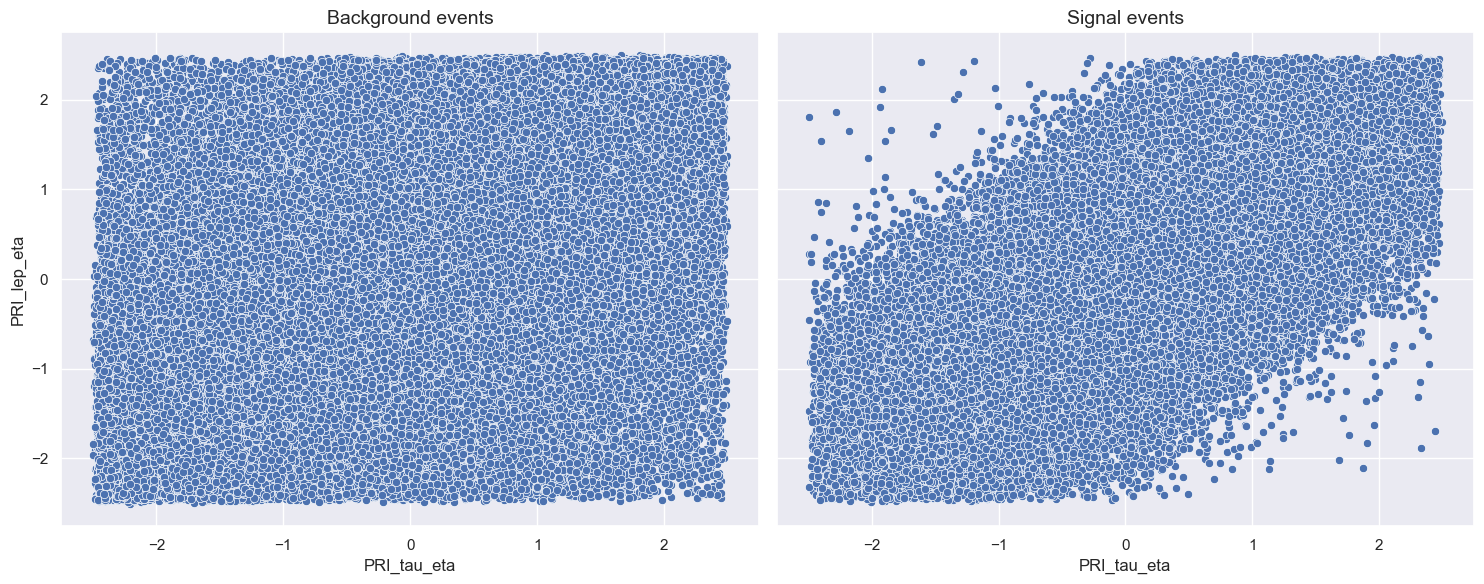

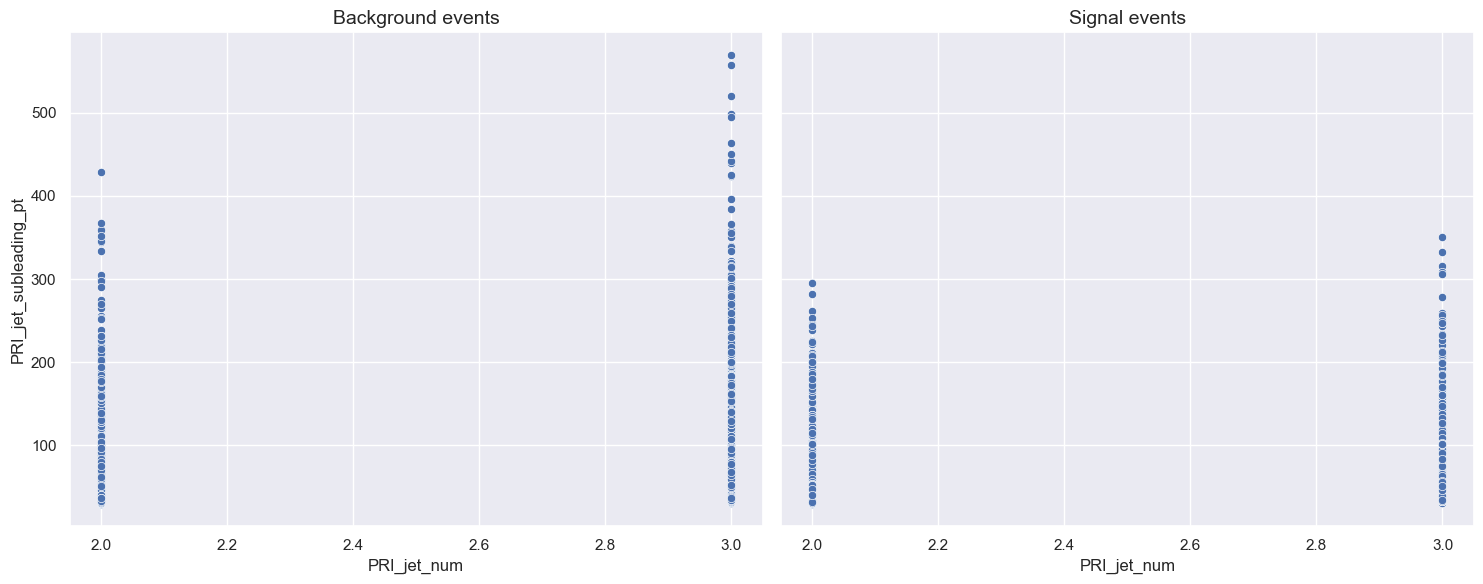

In [49]:
# Selected bivariate scatterplots
pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]
for z in pairs_selected:
    fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
    sns.scatterplot(data = data_train_b.replace(-999, np.nan), x = z[0], y = z[1], ax = ax[0])
    sns.scatterplot(data = data_train_s.replace(-999, np.nan), x = z[0], y = z[1], ax = ax[1])
    ax[0].set_title("Background events", fontsize = 14)
    ax[1].set_title("Signal events", fontsize = 14)
    plt.tight_layout()
plt.show()

## 4.3. Trivariate scatterplots

**Note:** The coloring of the observations in the plots corresponds to the second component of the triple.

In [ ]:
# Selected trivariate scatterplots
triples_selected = [
    ('DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_pt_tot'),
    ('DER_mass_MMC', 'DER_mass_vis', 'DER_prodeta_jet_jet'),
    ('DER_mass_MMC', 'DER_mass_vis', 'DER_pt_tot'),
    ('DER_mass_MMC', 'DER_mass_vis', 'PRI_lep_pt'),
    ('DER_mass_MMC', 'DER_pt_h', 'DER_pt_tot'),
    ('DER_mass_MMC', 'DER_pt_h', 'PRI_jet_subleading_pt'),
    ('DER_mass_MMC', 'DER_deltaeta_jet_jet', 'PRI_jet_num'),
    ('DER_mass_MMC', 'DER_mass_jet_jet', 'PRI_jet_subleading_eta'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet', 'DER_pt_tot'),
    ('DER_mass_MMC', 'DER_lep_eta_centrality', 'PRI_met'),
    ('DER_mass_MMC', 'DER_lep_eta_centrality', 'PRI_jet_num'),
    ('DER_mass_MMC', 'PRI_met_phi', 'PRI_jet_subleading_pt'),
    ('DER_mass_MMC', 'PRI_jet_num', 'PRI_jet_leading_pt'),
    ('DER_mass_vis', 'DER_pt_h', 'PRI_jet_leading_pt'),
    ('DER_pt_h', 'PRI_jet_num', 'PRI_jet_leading_eta'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_eta'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_phi'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_all_pt'),
    ('DER_deltaeta_jet_jet', 'DER_met_phi_centrality', 'PRI_jet_num'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep', 'PRI_lep_pt'),
    ('DER_mass_jet_jet', 'PRI_tau_pt', 'PRI_jet_subleading_eta'),
    ('DER_prodeta_jet_jet', 'DER_sum_pt', 'PRI_jet_all_pt'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta', 'PRI_jet_subleading_eta'),
    ('DER_deltar_tau_lep', 'PRI_lep_eta', 'PRI_jet_subleading_pt'),
    ('DER_pt_ratio_lep_tau', 'PRI_jet_num', 'PRI_jet_leading_pt'),
    ('DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_jet_num'),
    ('DER_met_phi_centrality', 'PRI_lep_eta', 'PRI_jet_num')
]
for z in triples_selected:
    fig = plt.figure(figsize = (15, 9))
    ax = fig.add_subplot(1, 2, 1, projection = '3d')
    x_b = data_train_b.replace(-999, np.nan)[z[0]]
    y_b = data_train_b.replace(-999, np.nan)[z[1]]
    z_b = data_train_b.replace(-999, np.nan)[z[2]]
    s1 = ax.scatter(x_b, y_b, z_b, s = 40, marker = 'o', c = y_b, alpha = 1)
    ax.set_title("Background events", fontsize = 14)
    ax.set_xlabel(z[0])
    ax.set_ylabel(z[1]) # ax.set_zlabel(z[2])
    ax = fig.add_subplot(1, 2, 2, projection = '3d')
    x_s = data_train_s.replace(-999, np.nan)[z[0]]
    y_s = data_train_s.replace(-999, np.nan)[z[1]]
    z_s = data_train_s.replace(-999, np.nan)[z[2]]
    s2 = ax.scatter(x_s, y_s, z_s, s = 40, marker = 'o', c = y_s, alpha = 1)
    ax.set_title("Signal events", fontsize = 14)
    ax.set_xlabel(z[0])
    ax.set_ylabel(z[1])
    ax.set_zlabel(z[2])
    plt.tight_layout()
plt.show()

## 5. Modeling

In [51]:
data_train.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
229462        86.104                       35.695        71.848    46.944   
48744        105.082                       77.535        71.954    67.413   
229702        56.116                       40.508        42.810    34.909   
1463         226.599                       39.495       153.789    47.582   
248187        91.745                       50.587        62.389    70.780   

        DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
229462                -999.0            -999.0               -999.0   
48744                 -999.0            -999.0               -999.0   
229702                -999.0            -999.0               -999.0   
1463                  -999.0            -999.0               -999.0   
248187                -999.0            -999.0               -999.0   

        DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
229462               2.082      46.944      60.557  ...        175.293   
48744                2.295      56.831     148.768  ...        232.430   
229702               1.572       1.957      93.030  ...        117.873   
1463                 3.704      47.582      70.582  ...        141.689   
248187               2.004       5.926     145.758  ...        248.518   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
229462            0            -999.000             -999.000   
48744             1              72.015                2.765   
229702            1              34.077               -2.112   
1463              0            -999.000             -999.000   
248187            1              76.318               -2.289   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
229462             -999.000                 -999.0                  -999.0   
48744                 0.723                 -999.0                  -999.0   
229702                0.367                 -999.0                  -999.0   
1463               -999.000                 -999.0                  -999.0   
248187                2.041                 -999.0                  -999.0   

        PRI_jet_subleading_phi  PRI_jet_all_pt  Label  
229462                  -999.0           0.000      b  
48744                   -999.0          72.015      s  
229702                  -999.0          34.077      b  
1463                    -999.0           0.000      b  
248187                  -999.0          76.318      b  

[5 rows x 31 columns]

In [ ]:
# null value imputation 
data_train = data_train.replace(-999, np.nan)
data_train = data_train.fillna(data_train.mean())

In [ ]:
data_test = data_test.replace(-999, np.nan)
data_test = data_test.fillna(data_train.mean())

In [54]:
data_test.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
41250      77.471000                       76.510        64.829     2.473   
10116     111.690000                       67.650       106.165     2.163   
23059     102.060000                       74.748        81.755   213.688   
114138    121.825842                       70.386        84.337     0.206   
241994    110.104000                       82.049        48.833   147.207   

        DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
41250               2.405936        371.895829            -0.816692   
10116               2.405936        371.895829            -0.816692   
23059               1.809000        763.536000            -0.432000   
114138              2.405936        371.895829            -0.816692   
241994              5.503000       1197.072000            -6.698000   

        DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
41250                2.372       2.473      71.101  ...        152.843   
10116                2.947       2.163      75.038  ...        109.156   
23059                0.848      28.365     773.517  ...        863.374   
114138               3.032       0.206      63.846  ...         25.530   
241994               1.374      22.902     246.401  ...        301.255   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
41250             0           84.817128            -0.006599   
10116             0           84.817128            -0.006599   
23059             2          342.401000            -0.283000   
114138            0           84.817128            -0.006599   
241994            2           97.989000             1.818000   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
41250             -0.009376              57.604374               -0.004748   
10116             -0.009376              57.604374               -0.004748   
23059              2.380000             212.719000                1.526000   
114138            -0.009376              57.604374               -0.004748   
241994            -2.002000              59.916000               -3.685000   

        PRI_jet_subleading_phi  PRI_jet_all_pt  Label  
41250                  0.00451           0.000      b  
10116                  0.00451           0.000      b  
23059                 -1.31500         555.120      b  
114138                 0.00451          -0.000      b  
241994                -2.80400         157.904      s  

[5 rows x 31 columns]

In [55]:
#separating numerical and categorical features
num_features = data_train.select_dtypes(include = ['float64', 'int64']).columns
cat_features = data_train.select_dtypes(include = ['object']).columns

In [56]:
#outlier removal using IQR
for i in num_features:
    q1 = data_train[i].quantile(0.25)
    q3 = data_train[i].quantile(0.75)
    iqr = q3 - q1
    data_train = data_train[(data_train[i] >= q1 - 1.5*iqr) & (data_train[i] <= q3 + 1.5*iqr)]

In [57]:
data_train.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
229462     86.104000                       35.695        71.848    46.944   
155765     96.355000                       47.839        70.546     1.963   
242842    125.025000                       39.171       102.428     1.760   
134932    121.825842                       82.719        55.307     3.862   
240120    102.951000                       30.396        79.685     6.660   

        DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
229462              2.405936        371.895829            -0.816692   
155765              2.405936        371.895829            -0.816692   
242842              2.405936        371.895829            -0.816692   
134932              2.405936        371.895829            -0.816692   
240120              2.405936        371.895829            -0.816692   

        DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
229462               2.082      46.944      60.557  ...        175.293   
155765               2.939       1.963      69.479  ...        132.390   
242842               3.544       1.760      56.508  ...         72.528   
134932               1.889       3.862      69.458  ...         86.284   
240120               2.744       6.660      70.807  ...        173.891   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
229462            0           84.817128            -0.006599   
155765            0           84.817128            -0.006599   
242842            0           84.817128            -0.006599   
134932            0           84.817128            -0.006599   
240120            0           84.817128            -0.006599   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
229462            -0.009376              57.604374               -0.004748   
155765            -0.009376              57.604374               -0.004748   
242842            -0.009376              57.604374               -0.004748   
134932            -0.009376              57.604374               -0.004748   
240120            -0.009376              57.604374               -0.004748   

        PRI_jet_subleading_phi  PRI_jet_all_pt  Label  
229462                 0.00451             0.0      b  
155765                 0.00451            -0.0      s  
242842                 0.00451            -0.0      b  
134932                 0.00451             0.0      b  
240120                 0.00451             0.0      s  

[5 rows x 31 columns]

In [58]:
X = data_train.drop(['Label'], axis = 1)
y = data_train['Label']

In [59]:
# normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
y.replace({'b':0,'s':1},inplace=True)

In [61]:
# keras neural network

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [62]:
model.fit(X,y,epochs=20)

Epoch 1/20
1705/1705 [==============================] - 7s 3ms/step - loss: 0.4146 - accuracy: 0.8073
Epoch 2/20
1705/1705 [==============================] - 5s 3ms/step - loss: 0.3705 - accuracy: 0.8351
Epoch 3/20
1705/1705 [==============================] - 5s 3ms/step - loss: 0.3656 - accuracy: 0.8365
Epoch 4/20
1705/1705 [==============================] - 7s 4ms/step - loss: 0.3632 - accuracy: 0.8381
Epoch 5/20
1705/1705 [==============================] - 5s 3ms/step - loss: 0.3617 - accuracy: 0.8378
Epoch 6/20
1705/1705 [==============================] - 8s 5ms/step - loss: 0.3609 - accuracy: 0.8387
Epoch 7/20
1705/1705 [==============================] - 8s 5ms/step - loss: 0.3601 - accuracy: 0.8392
Epoch 8/20
1705/1705 [==============================] - 5s 3ms/step - loss: 0.3596 - accuracy: 0.8387
Epoch 9/20
1705/1705 [==============================] - 5s 3ms/step - loss: 0.3594 - accuracy: 0.8390
Epoch 10/20
1705/1705 [==============================] - 5s 3ms/step - loss: 0.358